<a href="https://colab.research.google.com/github/JulesPeRiSo8/MacInfo/blob/main/wiremind_cargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

**Goal** = We aim at creating a model that provides a price per kg for any incoming shipment from a given agent.



# 1. Data Analysis

The price is defined by unity of weight (e.g. USD per kilogram), it must be derived from the Revenue and Chargeable Weight columns.

Due to the large number of categorical columns, we recommend focusing your analysis on just a few key ones, including :
- **Flown Month**
- **Product Code**
- **Agent Code**
- **Agent Name**.

All numerical columns can be analyzed.

**Fields Definition:**
- **FlownYear**: year the shipment has been flown
- **FlownMonth**: month the shipment has been flown
- **AgentCode**: code of the agent that owns the shipment
- **AgentName**: name of the agent that owns the shipment
- **POS**: point of sale, the city where the sale was made.
- **POSCountryName**: country of the POS
- **OriginCode**: origin of the shipment – it is the first city where the shipment enters the airline’s network. It may be different from the POS: for example, a sale made in JFK can be about a shipment that will start its journey in PHL. In this case, JFK is the POS and PHL the Origin.
- **DestinationCode**: final destination of the shipment.
- **CargoType**: type of shipment
- **ProductCode**: code of the ‘product’ from the airline – a product is usually related to the type of shipment (e.g. pharmaceuticals)
- **SpecialHandlingCodeList**: special handling codes of the shipment. A special handling code indicates specifics such as ‘Perishable shipment’, “Cargo Aircraft only”, etc.
- **CommodityCode**: commodity code
- **ChargeableWeight**: total weight of the shipment that has been invoiced to the agent
- **Pieces**: number of pieces of the shipment – a shipment can be 1 piece or many pieces.
- **Revenue**: total price paid by the agent to the airline for the shipment transportation

In [4]:
import pandas as pd

# Load csv file with pandas
data = pd.read_csv('/content/dataset.csv')

# Add the price column (revenue/chargeable_weight)
data['Price [USD/Kg]'] = data['Revenue'] / data['ChargeableWeight']

data.head()

,DocumentRatingSource,FlownYear,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,DestinationCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,XXXX,2017,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,RC,21.0,1,15.05,0.716667
1,XXXX,2017,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,13.2,1,9.46,0.716667
2,XXXX,2017,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,ZZZ,YYY,X,RWCBA,ZW,15.6,1,9.16,0.587179
3,XXXX,2017,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,ZZZ,YYY,X,RWCBA,ZW,3.0,1,2.15,0.716667
4,XXXX,2017,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,ZZZ,YYY,X,RWCBA,BW,12.0,1,17.08,1.423333


### Checking for null and unique values of the columns

In [5]:
print("Number of unique values for every column: ")
print("-----------------------------------------")

# Print the shape
print(f"Shape: {data.shape}")

# Check the number of unique values in each columns
for col in data.columns:
  print(f"{col}: {data[col].nunique()}")


Number of unique values for every column: 
-----------------------------------------
Shape: (7420, 17)
DocumentRatingSource: 6
FlownYear: 1
FlownMonth: 3
AgentCode: 679
AgentName: 664
POS: 147
POSCountryName: 62
OriginCode: 144
DestinationCode: 1
CargoType: 3
ProductCode: 18
SpecialHandlingCodeList: 552
CommodityCode: 222
ChargeableWeight: 2358
Pieces: 292
Revenue: 5475
Price [USD/Kg]: 2862


In [6]:
# Remove the columns that have only one value or are unnecessary
data.drop(columns={'DocumentRatingSource', 'FlownYear', 'DestinationCode'}, inplace=True)
data.head()


,FlownMonth,AgentCode,AgentName,POS,POSCountryName,OriginCode,CargoType,ProductCode,SpecialHandlingCodeList,CommodityCode,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,NOVEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,RC,21.0,1,15.05,0.716667
1,SEPTEMBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,13.2,1,9.46,0.716667
2,SEPTEMBER,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,JLL,LVSSPJMDKYSQRCHI,JLL,YYY,X,RWCBA,ZW,15.6,1,9.16,0.587179
3,OCTOBER,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,QQJ,FBDFZRQ7ONHZOUWG0XX3VAORZJQEAYOPBCLJ,FTS,YYY,X,RWCBA,ZW,3.0,1,2.15,0.716667
4,SEPTEMBER,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,JUW,JJDIVESWZJQEAYOPBCLJ,JUW,YYY,X,RWCBA,BW,12.0,1,17.08,1.423333


### Creating a dataset specific to analysis

In [7]:
# Create a smaller dataset for data analysis
data_for_analysis = data[['FlownMonth', 'ProductCode', 'AgentCode', 'AgentName','ChargeableWeight', 'Pieces', 'Revenue', 'Price [USD/Kg]']]
data_for_analysis.head()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,NOVEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,21.0,1,15.05,0.716667
1,SEPTEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,13.2,1,9.46,0.716667
2,SEPTEMBER,X,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,15.6,1,9.16,0.587179
3,OCTOBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,3.0,1,2.15,0.716667
4,SEPTEMBER,X,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,12.0,1,17.08,1.423333


### Modifying the FlownMonth column

In [8]:
# Change the FlownMonth column to make it easier to use for data analysis
data_for_analysis['FlownMonth'] = data_for_analysis['FlownMonth'].str.split().str[0]
data_for_analysis['FlownMonth'].unique()

<ipython-input-8-71e8b93570a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis['FlownMonth'] = data_for_analysis['FlownMonth'].str.split().str[0]


array(['NOVEMBER', 'SEPTEMBER', 'OCTOBER'], dtype=object)

In [9]:
# Define the correct month order
month_order = ['SEPTEMBER', 'OCTOBER', 'NOVEMBER']

# Convert FlownMonth to categorical type with custom order
data_for_analysis['FlownMonth'] = pd.Categorical(data_for_analysis['FlownMonth'], categories=month_order, ordered=True)

<ipython-input-9-a17f39a89923>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis['FlownMonth'] = pd.Categorical(data_for_analysis['FlownMonth'], categories=month_order, ordered=True)


In [10]:
data_for_analysis.head()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,NOVEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,21.0,1,15.05,0.716667
1,SEPTEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,13.2,1,9.46,0.716667
2,SEPTEMBER,X,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,15.6,1,9.16,0.587179
3,OCTOBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,3.0,1,2.15,0.716667
4,SEPTEMBER,X,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,12.0,1,17.08,1.423333


### Checking the AgentCode and AgentName values

In [11]:
# Check unique counts
unique_codes = data_for_analysis['AgentCode'].nunique()
unique_names = data_for_analysis['AgentName'].nunique()

print(f"Unique AgentCode: {unique_codes}")
print(f"Unique AgentName: {unique_names}")

Unique AgentCode: 679
Unique AgentName: 664


In [12]:
# Create a DataFrame of unique AgentCode-AgentName pairs
agent_pairs = data_for_analysis[['AgentCode', 'AgentName']].drop_duplicates()
print(agent_pairs.head())
print(agent_pairs.shape)

   AgentCode                        AgentName
0    SPRTQLS  SPRT4FP23CI1H34U12IFDORKMSBKLSW
2    PJMIGRN   PJMIGWSX3CI1SROQTOOFWTJYDDMKEH
4    PBKDDPW   PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH
7    VBTDDVB              VBTDW0QNSHVLXPOOMDT
15   SPRTOEI      SPRTOO1CIFHDSOFDUDSYBQZLZHU
(679, 2)


AgentCode > AgentName therefore let's check which AgentName has multiple AgentCodes

In [13]:
# Check the agents with multiple codes
agent_counts = agent_pairs.groupby('AgentName').nunique()
# print(agent_counts)
agents_with_multiple_codes = agent_counts[agent_counts['AgentCode'] > 1]
print(agents_with_multiple_codes)


                                   AgentCode
AgentName                                   
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH             5
HNHROWFR3GNZBAFJPRKMSBKLSW                10
HYOERLUNRG0JMTSUOZTWROZLGNZOAZOFS          2
NVDHBH1ZNR0OZGSOTJYDDMKEH                  2


So only 4 Agent have multiple codes

## Data Analysis

### Total weight flown per month

<ipython-input-14-adac86d2be80>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_weights = data_for_analysis.groupby('FlownMonth')['ChargeableWeight'].sum()


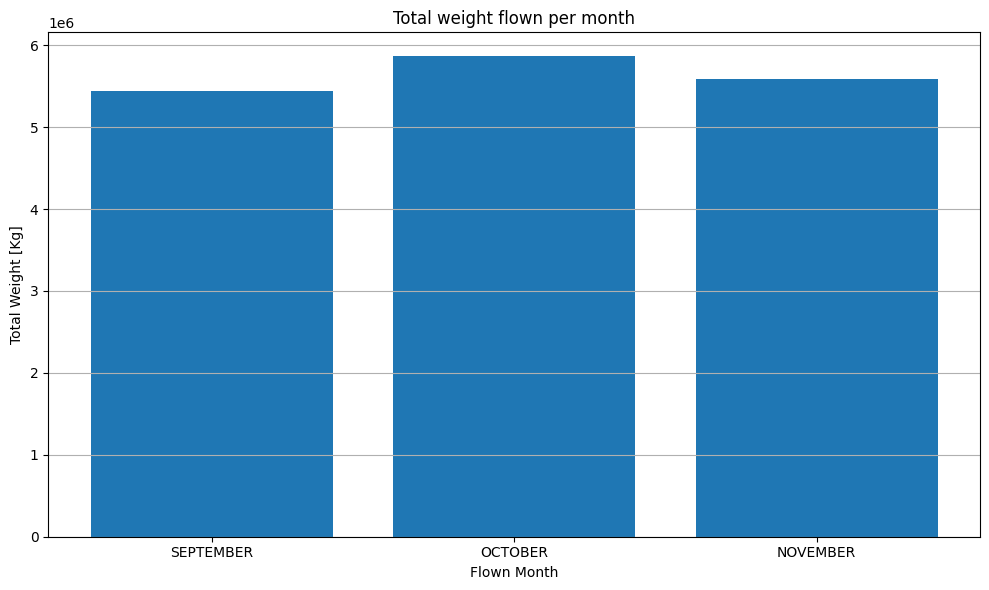

FlownMonth
SEPTEMBER    5445251.1
OCTOBER      5863149.3
NOVEMBER     5586391.5
Name: ChargeableWeight, dtype: float64


In [14]:
import matplotlib.pyplot as plt

# Calculate total weight for each month
total_weights = data_for_analysis.groupby('FlownMonth')['ChargeableWeight'].sum()

# Create the Bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(total_weights.index, total_weights.values)

plt.xlabel('Flown Month')
plt.ylabel('Total Weight [Kg]')
plt.title('Total weight flown per month')
plt.grid(axis='y')


# Show the plot
plt.tight_layout()
plt.show()

# Print the data for verification
print(total_weights)

The quantity of flow chargeable weight is similar during all 3 months with a slight increase of approximately 3000 Tonnes in october.

### Agent analysis

We will use the AgentName to produce graphs with other metrics and then do a specific analysis for the 4 AgentNames that have multiple AgentCodes.

As there is more than 600 agents, let's check the top 10 agents transporting the most weight.

In [15]:
# Calculate total weight for each AgentName
total_weights_per_agent = data_for_analysis.groupby('AgentName')['ChargeableWeight'].sum()
print(total_weights_per_agent.head())

# get the top 10 agents
top_10_agents = total_weights_per_agent.sort_values(ascending=False).head(n=10)
print(top_10_agents)

# Get the percentage of the top 10 agents over the entire weight transported
total_weight = data_for_analysis['ChargeableWeight'].sum()
top_10_percentage = (top_10_agents / total_weight) * 100
print(top_10_percentage)


AgentName
0BDRCSPQTIDSHA4FPLIGVBQIO0ED3GNZOAZOFS      300.0
0JMTSUDNUFLFQ3ZGBRKMSBKLSW                  918.0
3TDRJH1BAFJPRKMSBKLSW                      1368.0
AMKOU0HLBVVLXPOOMDT                       24891.0
AQN3UOPAAZ0MNGWVUHCGVLXPOOMDT              3867.0
Name: ChargeableWeight, dtype: float64
AgentName
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW            1007652.0
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS           888310.5
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS                680631.0
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT               674761.5
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT               619042.5
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU       552997.5
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                     430698.0
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH                   421239.0
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                    380848.5
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT     378433.5
Name: ChargeableWeight, dtype: float64
AgentName
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW            5.964276
FBQGC

In [16]:
# Check if any agents with multiple codes are in the top 10 agent
for i, v in enumerate(agents_with_multiple_codes.index.isin(top_10_agents.index)):
    if v == True:
        print("Agent in the Top 10:")
        print(f"{agents_with_multiple_codes.index[i]}\n")
    else:
        print("Not in the Top 10:")
        print(f"{agents_with_multiple_codes.index[i]}\n")

Agent in the Top 10:
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH

Not in the Top 10:
HNHROWFR3GNZBAFJPRKMSBKLSW

Not in the Top 10:
HYOERLUNRG0JMTSUOZTWROZLGNZOAZOFS

Not in the Top 10:
NVDHBH1ZNR0OZGSOTJYDDMKEH



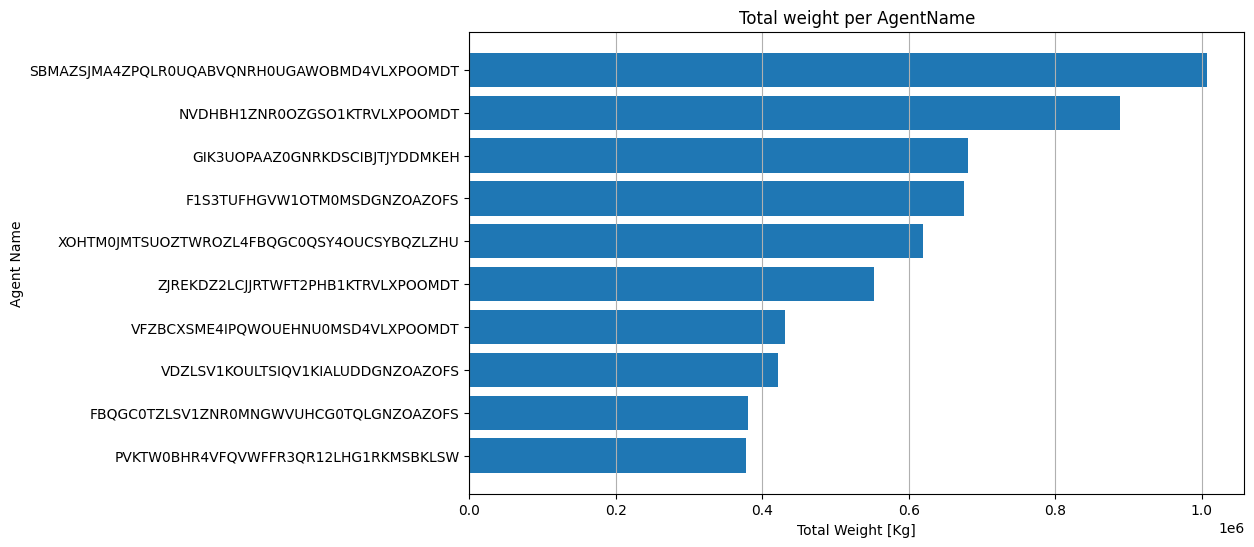

In [17]:
# Create the Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_agents.index, top_10_agents.sort_values(ascending=True).values)

plt.xlabel('Total Weight [Kg]')
plt.ylabel('Agent Name')
plt.title('Total weight per AgentName')
plt.grid(axis='x')


# # Show the plot
plt.show()

Text(0.5, 1.0, 'Percentage of the chargeable weight of the top 10 agents (Total weight is the sum of the top 10 agents)')

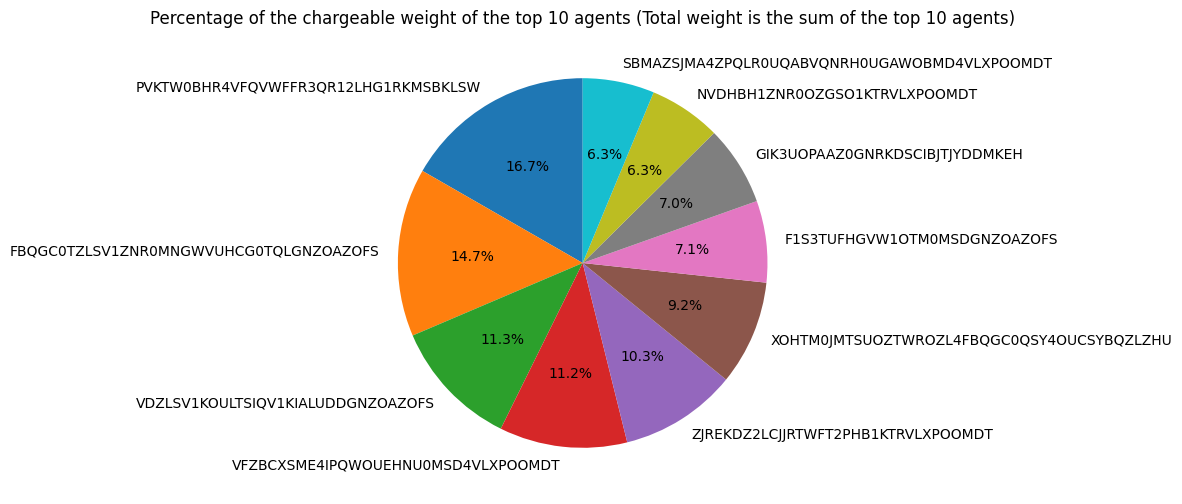

In [18]:
# Create the Pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_10_percentage.values, labels=top_10_percentage.index, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of the chargeable weight of the top 10 agents (Total weight is the sum of the top 10 agents)')


Let's have a closer look to AgentName: GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH, as it has multiple AgentCode and is in the Top 10

In [19]:
# Agent name and code
agents_names_codes = data_for_analysis.groupby(['AgentName', 'AgentCode'])['ChargeableWeight'].sum()
print(agents_names_codes)

# Find the Agent GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH
agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH = agents_names_codes.groupby('AgentName').get_group('GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH')
print(agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH)


AgentName                                    AgentCode
0BDRCSPQTIDSHA4FPLIGVBQIO0ED3GNZOAZOFS       DFQODES        300.0
0JMTSUDNUFLFQ3ZGBRKMSBKLSW                   LOSEFSU        918.0
3TDRJH1BAFJPRKMSBKLSW                        3TDRJFZ       1368.0
AMKOU0HLBVVLXPOOMDT                          AMKOUGF      24891.0
AQN3UOPAAZ0MNGWVUHCGVLXPOOMDT                FPM34XT       3867.0
                                                           ...   
ZPQLR0DNUFLFQSYBQZLZHU                       ZPQLRCB         66.0
ZPQLR0DZRUR1RRZVLXPOOMDT                     ZPQLRLU       4636.5
ZPQLR0GQEWJIS3GHSUIQHTJYDDMKEH               ZPQLRWO       9954.0
ZPQLR0XHDS0QDRWVIZBZHT2EBWFQPFLTDSGNZOAZOFS  ZPQL8XT       3144.0
ZXF3QROROZLEZTCUT2PJW1KTRVLXPOOMDT           ZXBPHSL        387.0
Name: ChargeableWeight, Length: 679, dtype: float64
AgentName                       AgentCode
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH  GBMZOCB         885.0
                                GIKDOEF        4470.0
                 

AgentCode
GIKLCJC    387228.0
GIKDOXT     26343.0
GIKDOEF      4470.0
GIKGZKS      2313.0
GBMZOCB       885.0
Name: ChargeableWeight, dtype: float64


Text(0.5, 1.0, 'Percentage of Agent GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH codes')

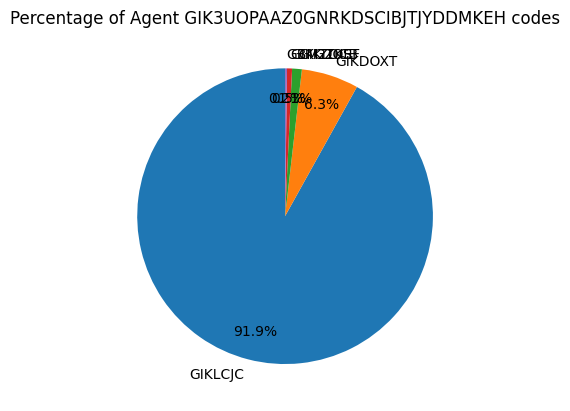

In [20]:
# Create the Pie chart
agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH_codes = agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.groupby('AgentCode').sum().sort_values(ascending=False)
print(agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH_codes)
# plt.figure(figsize=(10, 6))
plt.pie(agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH_codes.values,
        labels=agent_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH_codes.index,
        autopct='%1.1f%%',
        labeldistance=1.1,
        pctdistance=0.8,
        startangle=90)

plt.title('Percentage of Agent GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH codes')

Eventhough the graph is not readable for the small value, it is clear that agent GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH has the biggest use of our service for the code GIKLCJC.

Now let's check usage per month of the different AgentNames

In [21]:
# Check the usage per month of the different AgentNames
# loc the top 10 agents in the entire dataframe
top_10_agents_df = data_for_analysis.loc[data_for_analysis['AgentName'].isin(top_10_agents.index)]

print(top_10_agents_df.shape)

top_10_agents_df.head()


(1344, 8)


,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
680,OCTOBER,DLJ,ZJREKDV,ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT,7410.0,5,938.60,0.126667
681,SEPTEMBER,DLJ,ZJREKDV,ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT,21120.0,20,2675.20,0.126667
682,SEPTEMBER,DLJ,ZJREKDV,ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT,13540.5,8,1715.15,0.126668
683,SEPTEMBER,DLJ,ZJREKDV,ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT,6807.0,5,862.20,0.126664
684,SEPTEMBER,DLJ,ZJREKDV,ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT,4668.0,4,591.30,0.126671


## Top 10 agents analysis


### Charge per month analysis

In [22]:
# Group the charge of each agents for each month
charge_per_month_per_agent = data_for_analysis.groupby(['AgentName', 'AgentCode', 'FlownMonth'], observed=True)['ChargeableWeight'].sum().unstack()

charge_per_month_per_agent


,FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,AgentCode,,,
0BDRCSPQTIDSHA4FPLIGVBQIO0ED3GNZOAZOFS,DFQODES,NaN,NaN,300.0
0JMTSUDNUFLFQ3ZGBRKMSBKLSW,LOSEFSU,NaN,918.0,NaN
3TDRJH1BAFJPRKMSBKLSW,3TDRJFZ,399.0,270.0,699.0
AMKOU0HLBVVLXPOOMDT,AMKOUGF,NaN,3148.5,21742.5
AQN3UOPAAZ0MNGWVUHCGVLXPOOMDT,FPM34XT,3867.0,NaN,NaN
...,...,...,...,...
ZPQLR0DNUFLFQSYBQZLZHU,ZPQLRCB,3.0,60.0,3.0
ZPQLR0DZRUR1RRZVLXPOOMDT,ZPQLRLU,1342.5,NaN,3294.0
ZPQLR0GQEWJIS3GHSUIQHTJYDDMKEH,ZPQLRWO,NaN,7182.0,2772.0


In [23]:
top_10_charge_per_month_per_agent = charge_per_month_per_agent.loc[top_10_agents.index]
top_10_charge_per_month_per_agent

FlownMonth                                              SEPTEMBER   OCTOBER  \
AgentName                                    AgentCode                        
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI     327450.0  362772.0   
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU     317016.0  358429.5   
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA     155844.0  432060.0   
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC     242799.0  204103.5   
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV     162526.5  223545.0   
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV     206847.0  218113.5   
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV      22272.0  317469.0   
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB        501.0     384.0   
                                             GIKDOEF         57.0     168.0   
                                             GIKDOXT       3000.0   13369.5   
                                             GIKGZKS        760.5       NaN   
                                             GIKLCJC     101073.0  137787.0   
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC     129229.5  119197.5   
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI     127948.5  108570.0   

FlownMonth                                              NOVEMBER  
AgentName                                    AgentCode            
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI    317430.0  
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU    212865.0  
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA     92727.0  
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC    227859.0  
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV    232971.0  
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV    128037.0  
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV     90957.0  
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB         NaN  
                                             GIKDOEF      4245.0  
                                             GIKDOXT      9973.5  
                                             GIKGZKS      1552.5  
                                             GIKLCJC    148368.0  
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC    132421.5  
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI    141915.0

In [24]:
# Top 10 grouped
top_10_charge_per_month_per_agent_names = top_10_charge_per_month_per_agent.groupby('AgentName').sum()
top_10_charge_per_month_per_agent_names


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,,,
F1S3TUFHGVW1OTM0MSDGNZOAZOFS,22272.0,317469.0,90957.0
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS,317016.0,358429.5,212865.0
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH,105391.5,151708.5,164139.0
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT,129229.5,119197.5,132421.5
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW,327450.0,362772.0,317430.0
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT,127948.5,108570.0,141915.0
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS,155844.0,432060.0,92727.0
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT,242799.0,204103.5,227859.0
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU,206847.0,218113.5,128037.0


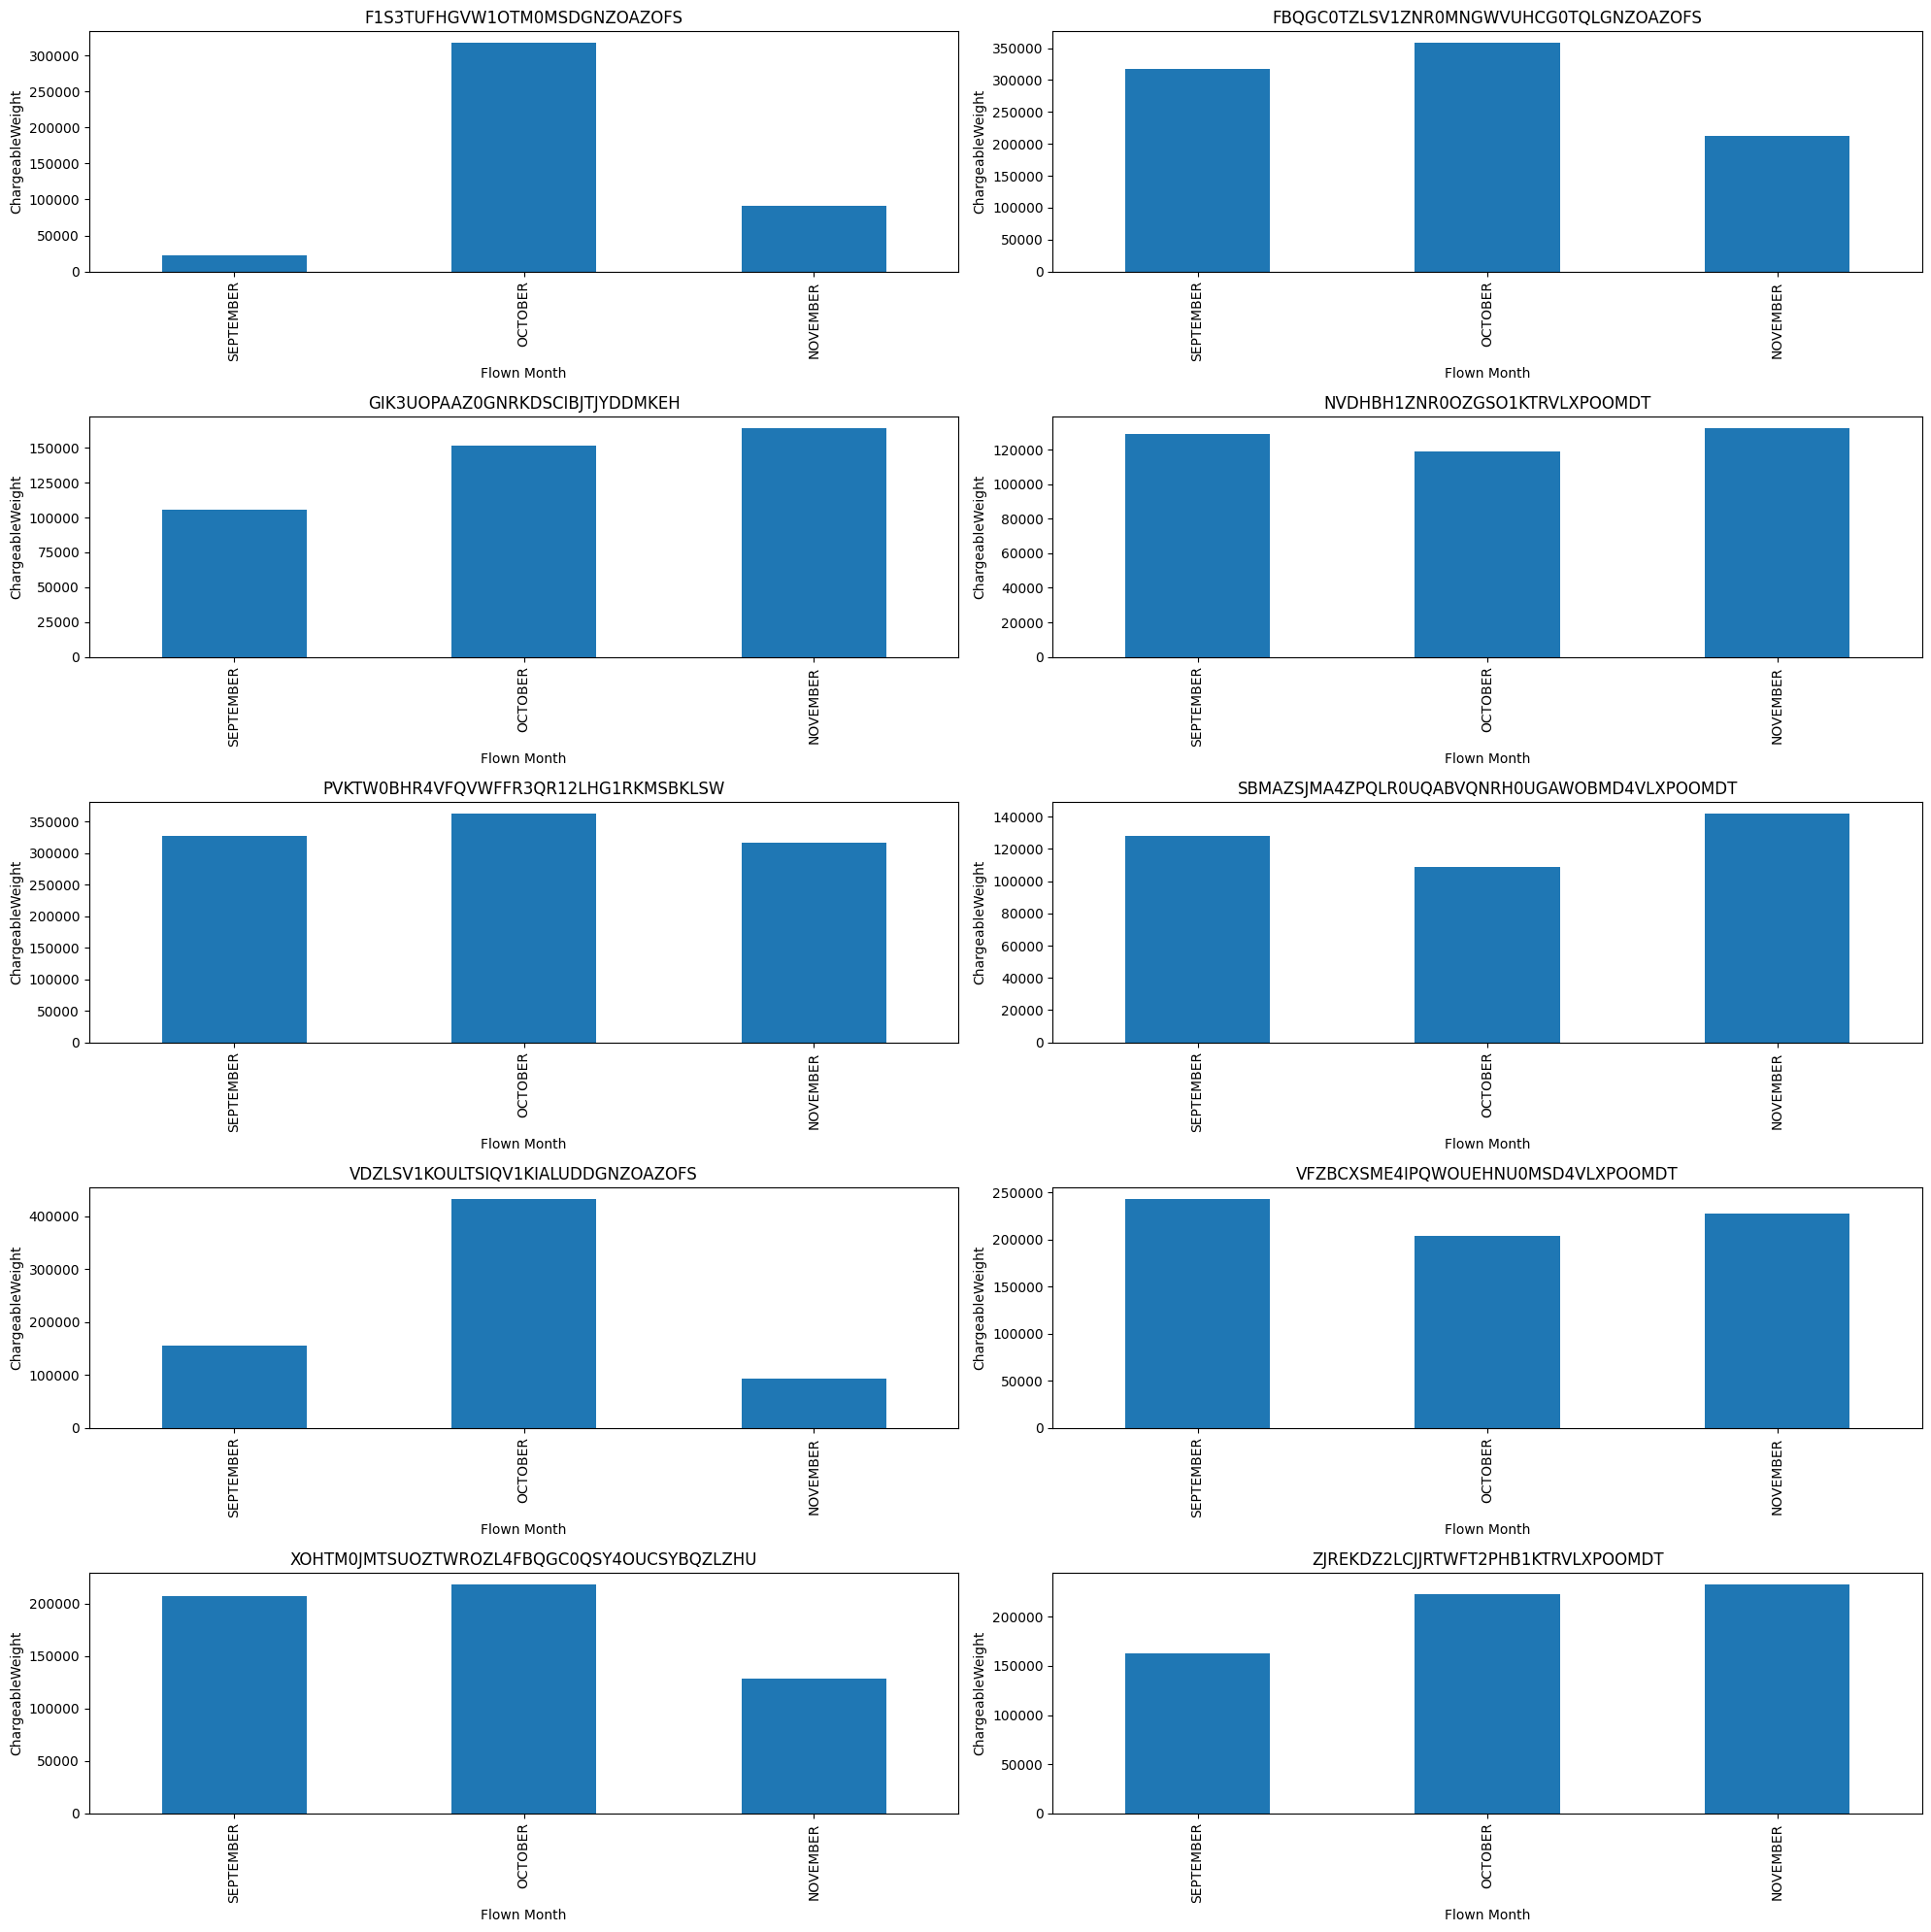

In [25]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent in enumerate(top_10_charge_per_month_per_agent_names.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    top_10_charge_per_month_per_agent_names.loc[agent].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('ChargeableWeight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

Most top 10 agents have a constant chargeable weight except 2 which has more weight in october.

### Price analysis

In [26]:
# Group the price of each agents for each month
price_per_month_per_agent = data_for_analysis.groupby(['AgentName', 'AgentCode', 'FlownMonth'], observed=True)['Price [USD/Kg]'].mean().unstack()

price_per_month_per_agent

,FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,AgentCode,,,
0BDRCSPQTIDSHA4FPLIGVBQIO0ED3GNZOAZOFS,DFQODES,NaN,NaN,0.733333
0JMTSUDNUFLFQ3ZGBRKMSBKLSW,LOSEFSU,NaN,0.497658,NaN
3TDRJH1BAFJPRKMSBKLSW,3TDRJFZ,2.156429,2.557531,1.244444
AMKOU0HLBVVLXPOOMDT,AMKOUGF,NaN,0.433333,1.219996
AQN3UOPAAZ0MNGWVUHCGVLXPOOMDT,FPM34XT,0.603333,NaN,NaN
...,...,...,...,...
ZPQLR0DNUFLFQSYBQZLZHU,ZPQLRCB,484.300000,17.713333,547.700000
ZPQLR0DZRUR1RRZVLXPOOMDT,ZPQLRLU,0.378337,NaN,0.446667
ZPQLR0GQEWJIS3GHSUIQHTJYDDMKEH,ZPQLRWO,NaN,1.188056,0.955833


In [27]:
top_10_price_per_month_per_agent = price_per_month_per_agent.loc[top_10_agents.index]
top_10_price_per_month_per_agent

FlownMonth                                              SEPTEMBER    OCTOBER  \
AgentName                                    AgentCode                         
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI     3.333333   3.595238   
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU     0.263280   0.306310   
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA     0.275000   0.280080   
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC     0.410222   0.408675   
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV     0.130000   0.127778   
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV     0.135757   0.138205   
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV     0.150000   0.162963   
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB     6.339920  20.841364   
                                             GIKDOEF     5.730159   1.096667   
                                             GIKDOXT     0.736667   0.923335   
                                             GIKGZKS     2.802235        NaN   
                                             GIKLCJC     0.229516   0.263472   
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC     0.273897   0.330195   
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI     3.622235   4.000000   

FlownMonth                                              NOVEMBER  
AgentName                                    AgentCode            
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI    3.333333  
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU    0.311278  
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA    0.275000  
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC    0.425125  
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV    0.150980  
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV    0.138789  
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV    0.166667  
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB         NaN  
                                             GIKDOEF    1.383882  
                                             GIKDOXT    0.946745  
                                             GIKGZKS    2.321481  
                                             GIKLCJC    0.201134  
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC    0.594213  
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI    3.690476

In [28]:
# Top 10 grouped
top_10_price_per_month_per_agent_names = top_10_price_per_month_per_agent.groupby('AgentName').sum()
top_10_price_per_month_per_agent_names

FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,,,
F1S3TUFHGVW1OTM0MSDGNZOAZOFS,0.150000,0.162963,0.166667
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS,0.263280,0.306310,0.311278
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH,15.838497,23.124837,4.853242
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT,0.273897,0.330195,0.594213
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW,3.333333,3.595238,3.333333
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT,3.622235,4.000000,3.690476
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS,0.275000,0.280080,0.275000
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT,0.410222,0.408675,0.425125
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU,0.135757,0.138205,0.138789


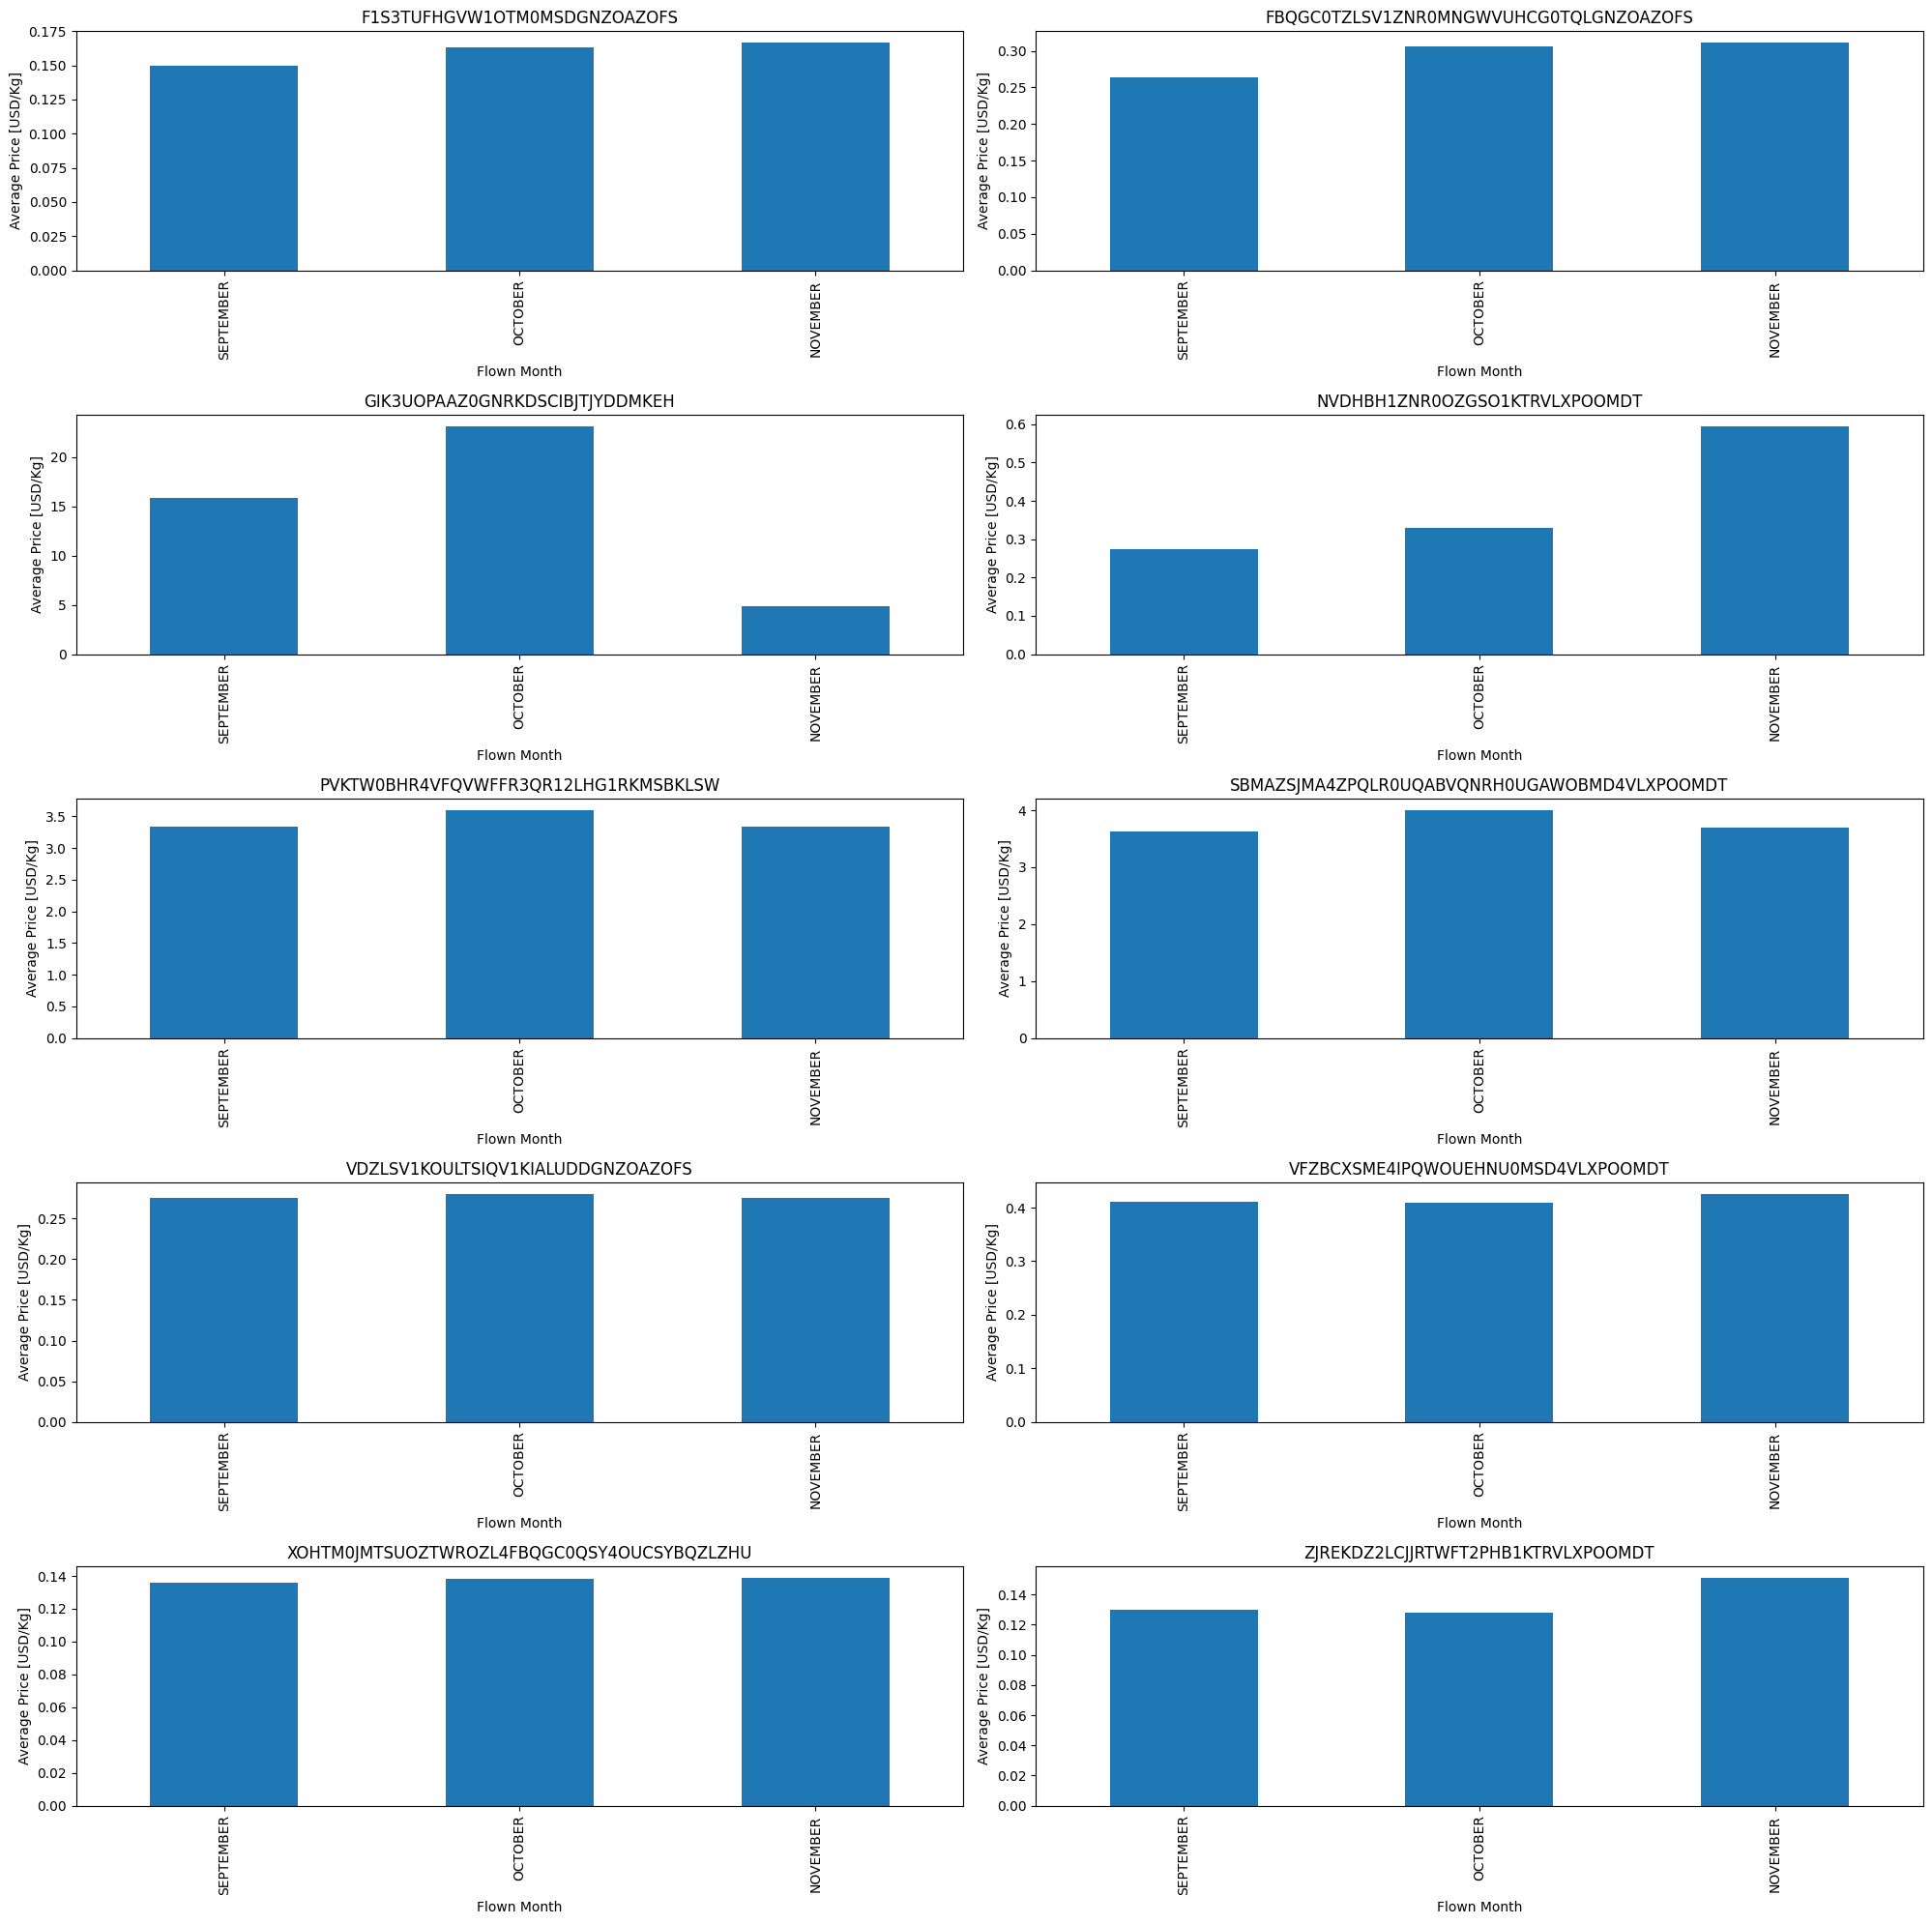

In [29]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent in enumerate(top_10_price_per_month_per_agent_names.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    top_10_price_per_month_per_agent_names.loc[agent].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Average Price [USD/Kg]')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

### Revenue analysis

In [30]:
# Group the price of each agents for each month
revenue_per_month_per_agent = data_for_analysis.groupby(['AgentName', 'AgentCode', 'FlownMonth'], observed=True)['Revenue'].mean().unstack()

revenue_per_month_per_agent

,FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,AgentCode,,,
0BDRCSPQTIDSHA4FPLIGVBQIO0ED3GNZOAZOFS,DFQODES,NaN,NaN,220.000000
0JMTSUDNUFLFQ3ZGBRKMSBKLSW,LOSEFSU,NaN,456.850000,NaN
3TDRJH1BAFJPRKMSBKLSW,3TDRJFZ,121.875000,91.636667,170.506667
AMKOU0HLBVVLXPOOMDT,AMKOUGF,NaN,1364.350000,26525.759000
AQN3UOPAAZ0MNGWVUHCGVLXPOOMDT,FPM34XT,777.003333,NaN,NaN
...,...,...,...,...
ZPQLR0DNUFLFQSYBQZLZHU,ZPQLRCB,1452.900000,1062.800000,1643.100000
ZPQLR0DZRUR1RRZVLXPOOMDT,ZPQLRLU,255.000000,NaN,1471.320000
ZPQLR0GQEWJIS3GHSUIQHTJYDDMKEH,ZPQLRWO,NaN,2842.970000,2649.570000


In [31]:
top_10_revenue_per_month_per_agent = revenue_per_month_per_agent.loc[top_10_agents.index]
top_10_revenue_per_month_per_agent

FlownMonth                                                 SEPTEMBER  \
AgentName                                    AgentCode                 
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI    90958.333333   
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU     2131.388737   
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA    21336.600000   
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC      344.583993   
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV     1177.163889   
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV     1270.240909   
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV     3340.800000   
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB     3176.300000   
                                             GIKDOEF       47.500000   
                                             GIKDOXT     2210.000000   
                                             GIKGZKS     2131.100000   
                                             GIKLCJC      478.094472   
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC      924.413235   
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI    30696.733333   

FlownMonth                                                   OCTOBER  \
AgentName                                    AgentCode                 
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI    93428.928571   
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU     2580.051341   
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA    29139.972750   
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC      382.088531   
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV     1197.514583   
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV     1150.858846   
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV     5541.622222   
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB     2194.555000   
                                             GIKDOEF      184.240000   
                                             GIKDOXT     2291.448000   
                                             GIKGZKS             NaN   
                                             GIKLCJC      858.917382   
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC      841.956000   
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI    36190.000000   

FlownMonth                                                  NOVEMBER  
AgentName                                    AgentCode                
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW         PVKTWWI    75578.571429  
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS       FBQGGLU     2005.340625  
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS            VDZLSQA    11947.125000  
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT           VFZB6JC      333.040148  
ZJREKDZ2LCJJRTWFT2PHB1KTRVLXPOOMDT           ZJREKDV     1948.958824  
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU   XOHTMDV      809.402273  
F1S3TUFHGVW1OTM0MSDGNZOAZOFS                 FUERSDV     7579.750000  
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH               GBMZOCB             NaN  
                                             GIKDOEF      740.720000  
                                             GIKDOXT     2255.425000  
                                             GIKGZKS     1802.050000  
                                             GIKLCJC      751.213000  
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT                NVDHBJC     1009.332105  
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT SBMAZWI    37313.214286

In [32]:
# Top 10 grouped
top_10_revenue_per_month_per_agent_names = top_10_revenue_per_month_per_agent.groupby('AgentName').sum()
top_10_revenue_per_month_per_agent_names

FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentName,,,
F1S3TUFHGVW1OTM0MSDGNZOAZOFS,3340.800000,5541.622222,7579.750000
FBQGC0TZLSV1ZNR0MNGWVUHCG0TQLGNZOAZOFS,2131.388737,2580.051341,2005.340625
GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH,8042.994472,5529.160382,5549.408000
NVDHBH1ZNR0OZGSO1KTRVLXPOOMDT,924.413235,841.956000,1009.332105
PVKTW0BHR4VFQVWFFR3QR12LHG1RKMSBKLSW,90958.333333,93428.928571,75578.571429
SBMAZSJMA4ZPQLR0UQABVQNRH0UGAWOBMD4VLXPOOMDT,30696.733333,36190.000000,37313.214286
VDZLSV1KOULTSIQV1KIALUDDGNZOAZOFS,21336.600000,29139.972750,11947.125000
VFZBCXSME4IPQWOUEHNU0MSD4VLXPOOMDT,344.583993,382.088531,333.040148
XOHTM0JMTSUOZTWROZL4FBQGC0QSY4OUCSYBQZLZHU,1270.240909,1150.858846,809.402273


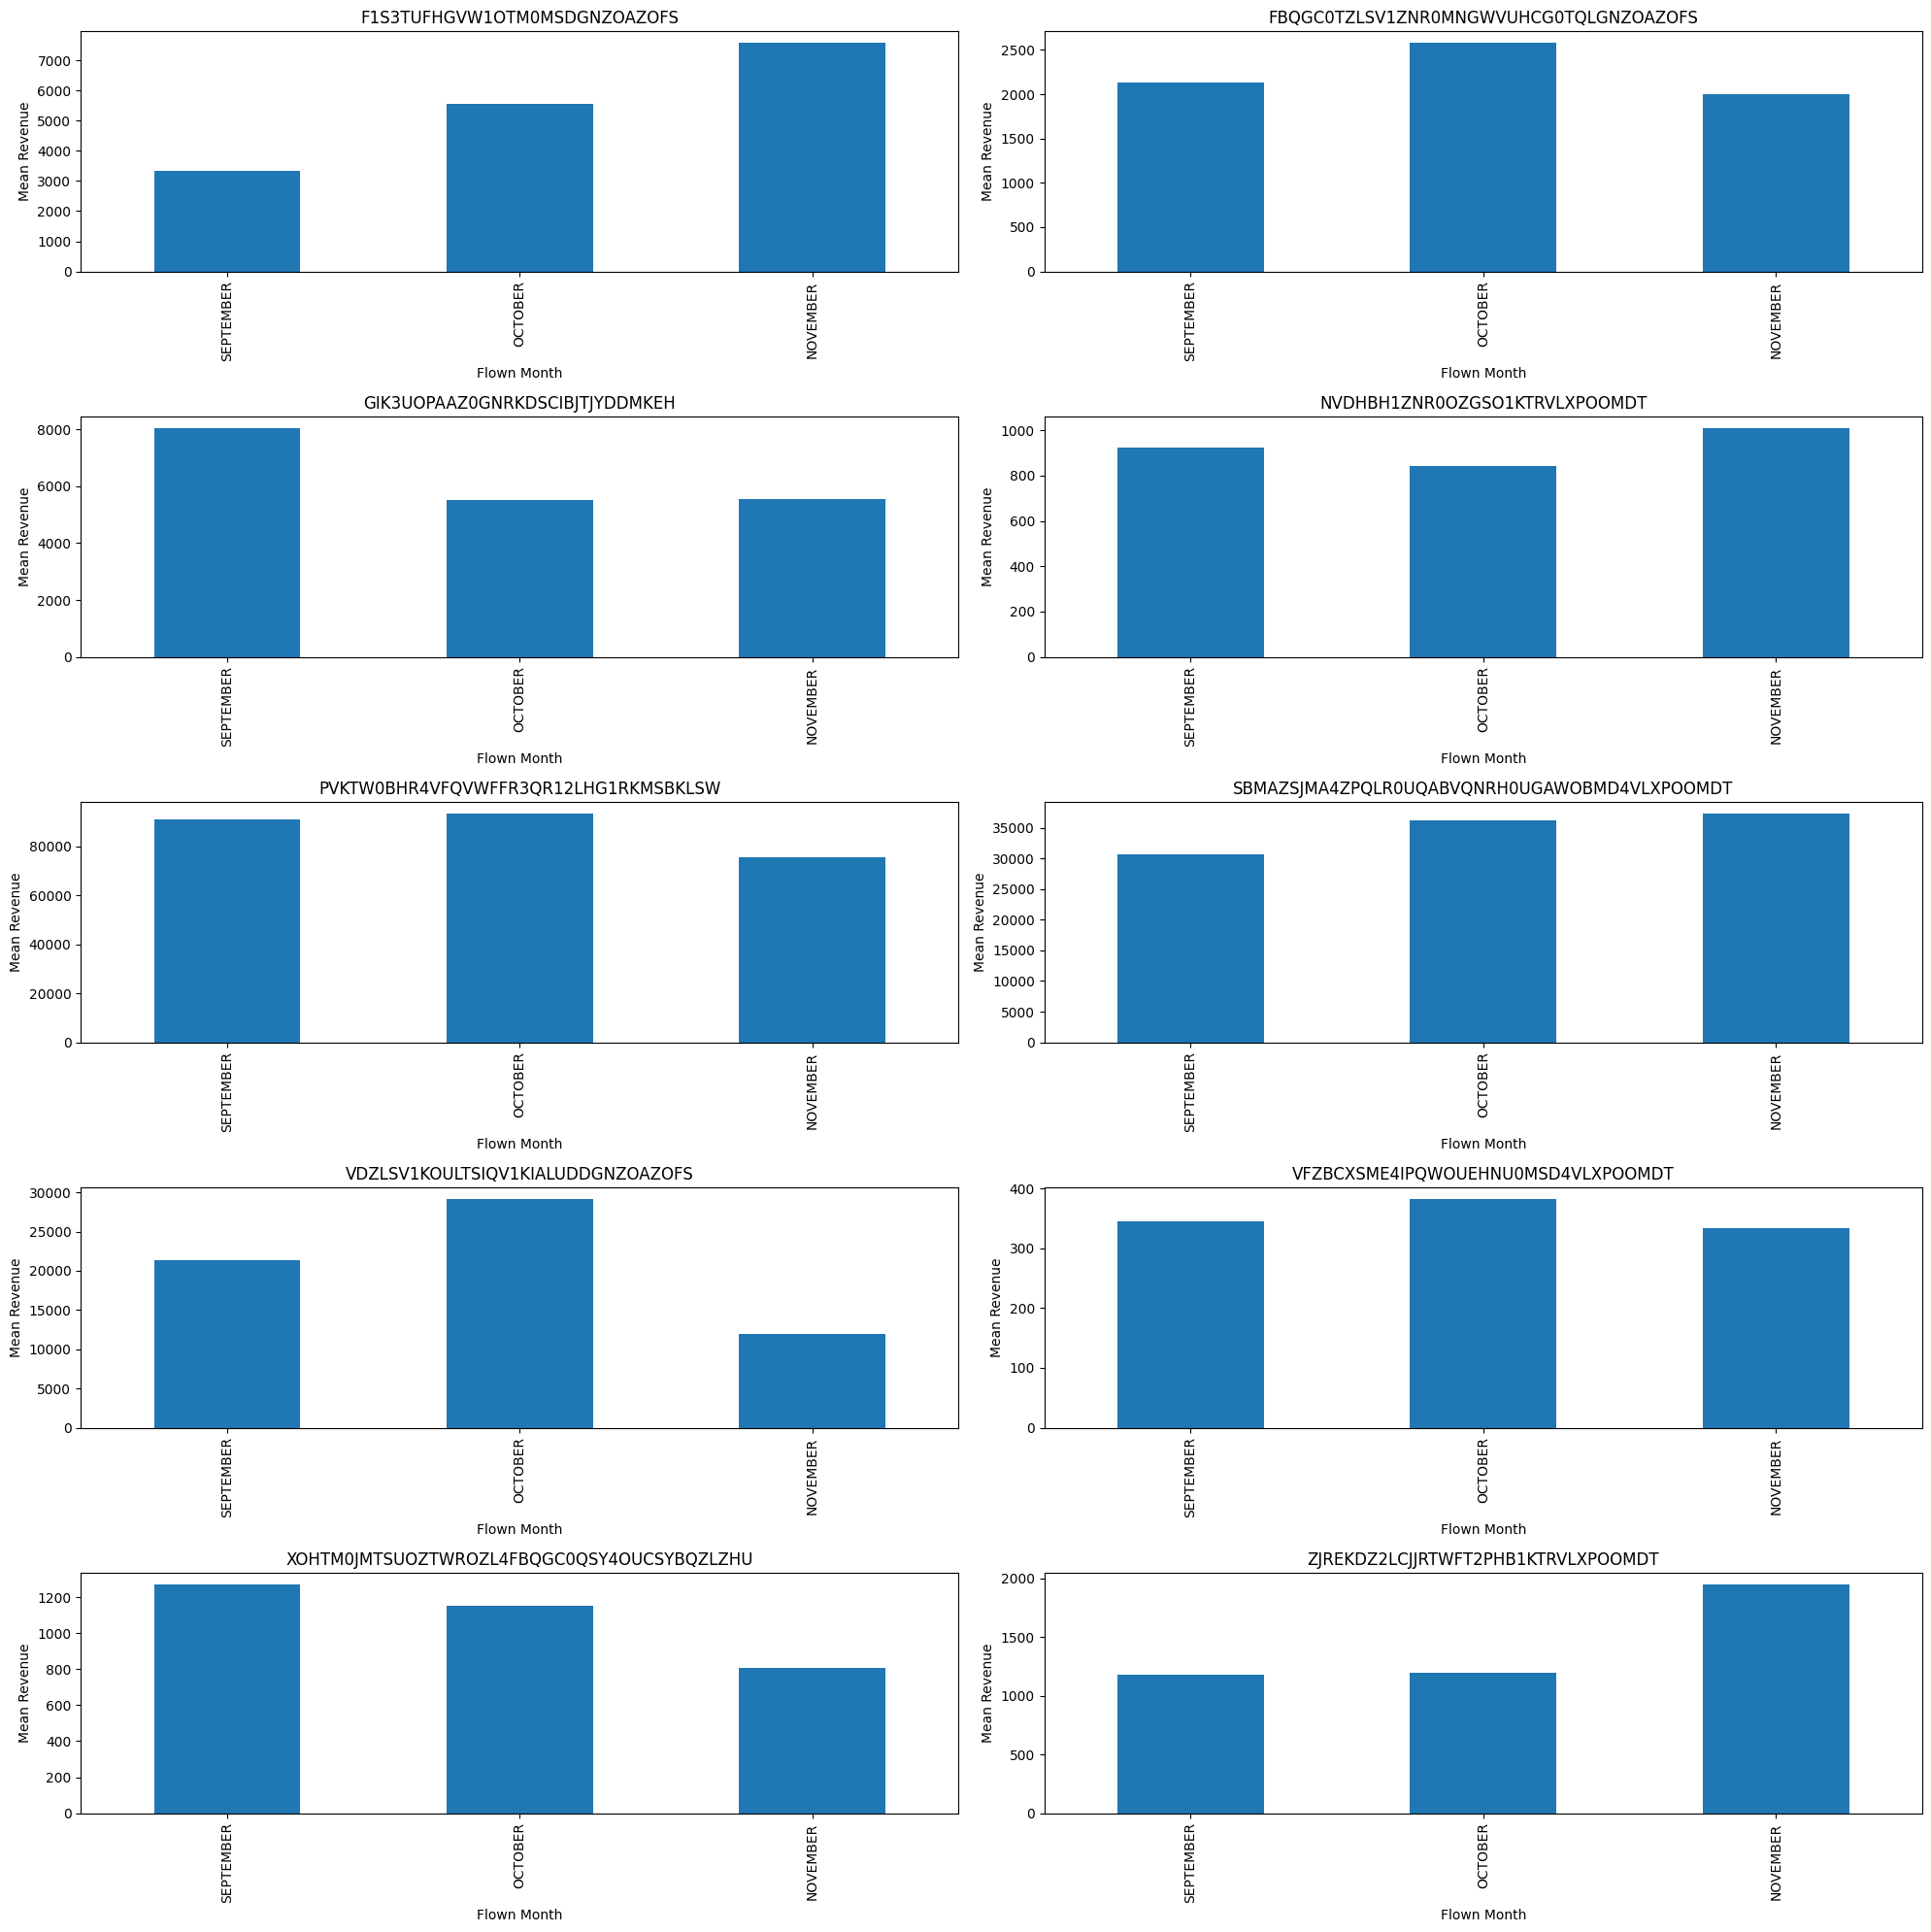

In [33]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent in enumerate(top_10_revenue_per_month_per_agent_names.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    top_10_revenue_per_month_per_agent_names.loc[agent].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Mean Revenue')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

### Agent GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH analysis

In [34]:
# Charge
charge_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH = top_10_charge_per_month_per_agent.loc['GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH']

charge_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH

FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentCode,,,
GBMZOCB,501.0,384.0,NaN
GIKDOEF,57.0,168.0,4245.0
GIKDOXT,3000.0,13369.5,9973.5
GIKGZKS,760.5,NaN,1552.5
GIKLCJC,101073.0,137787.0,148368.0


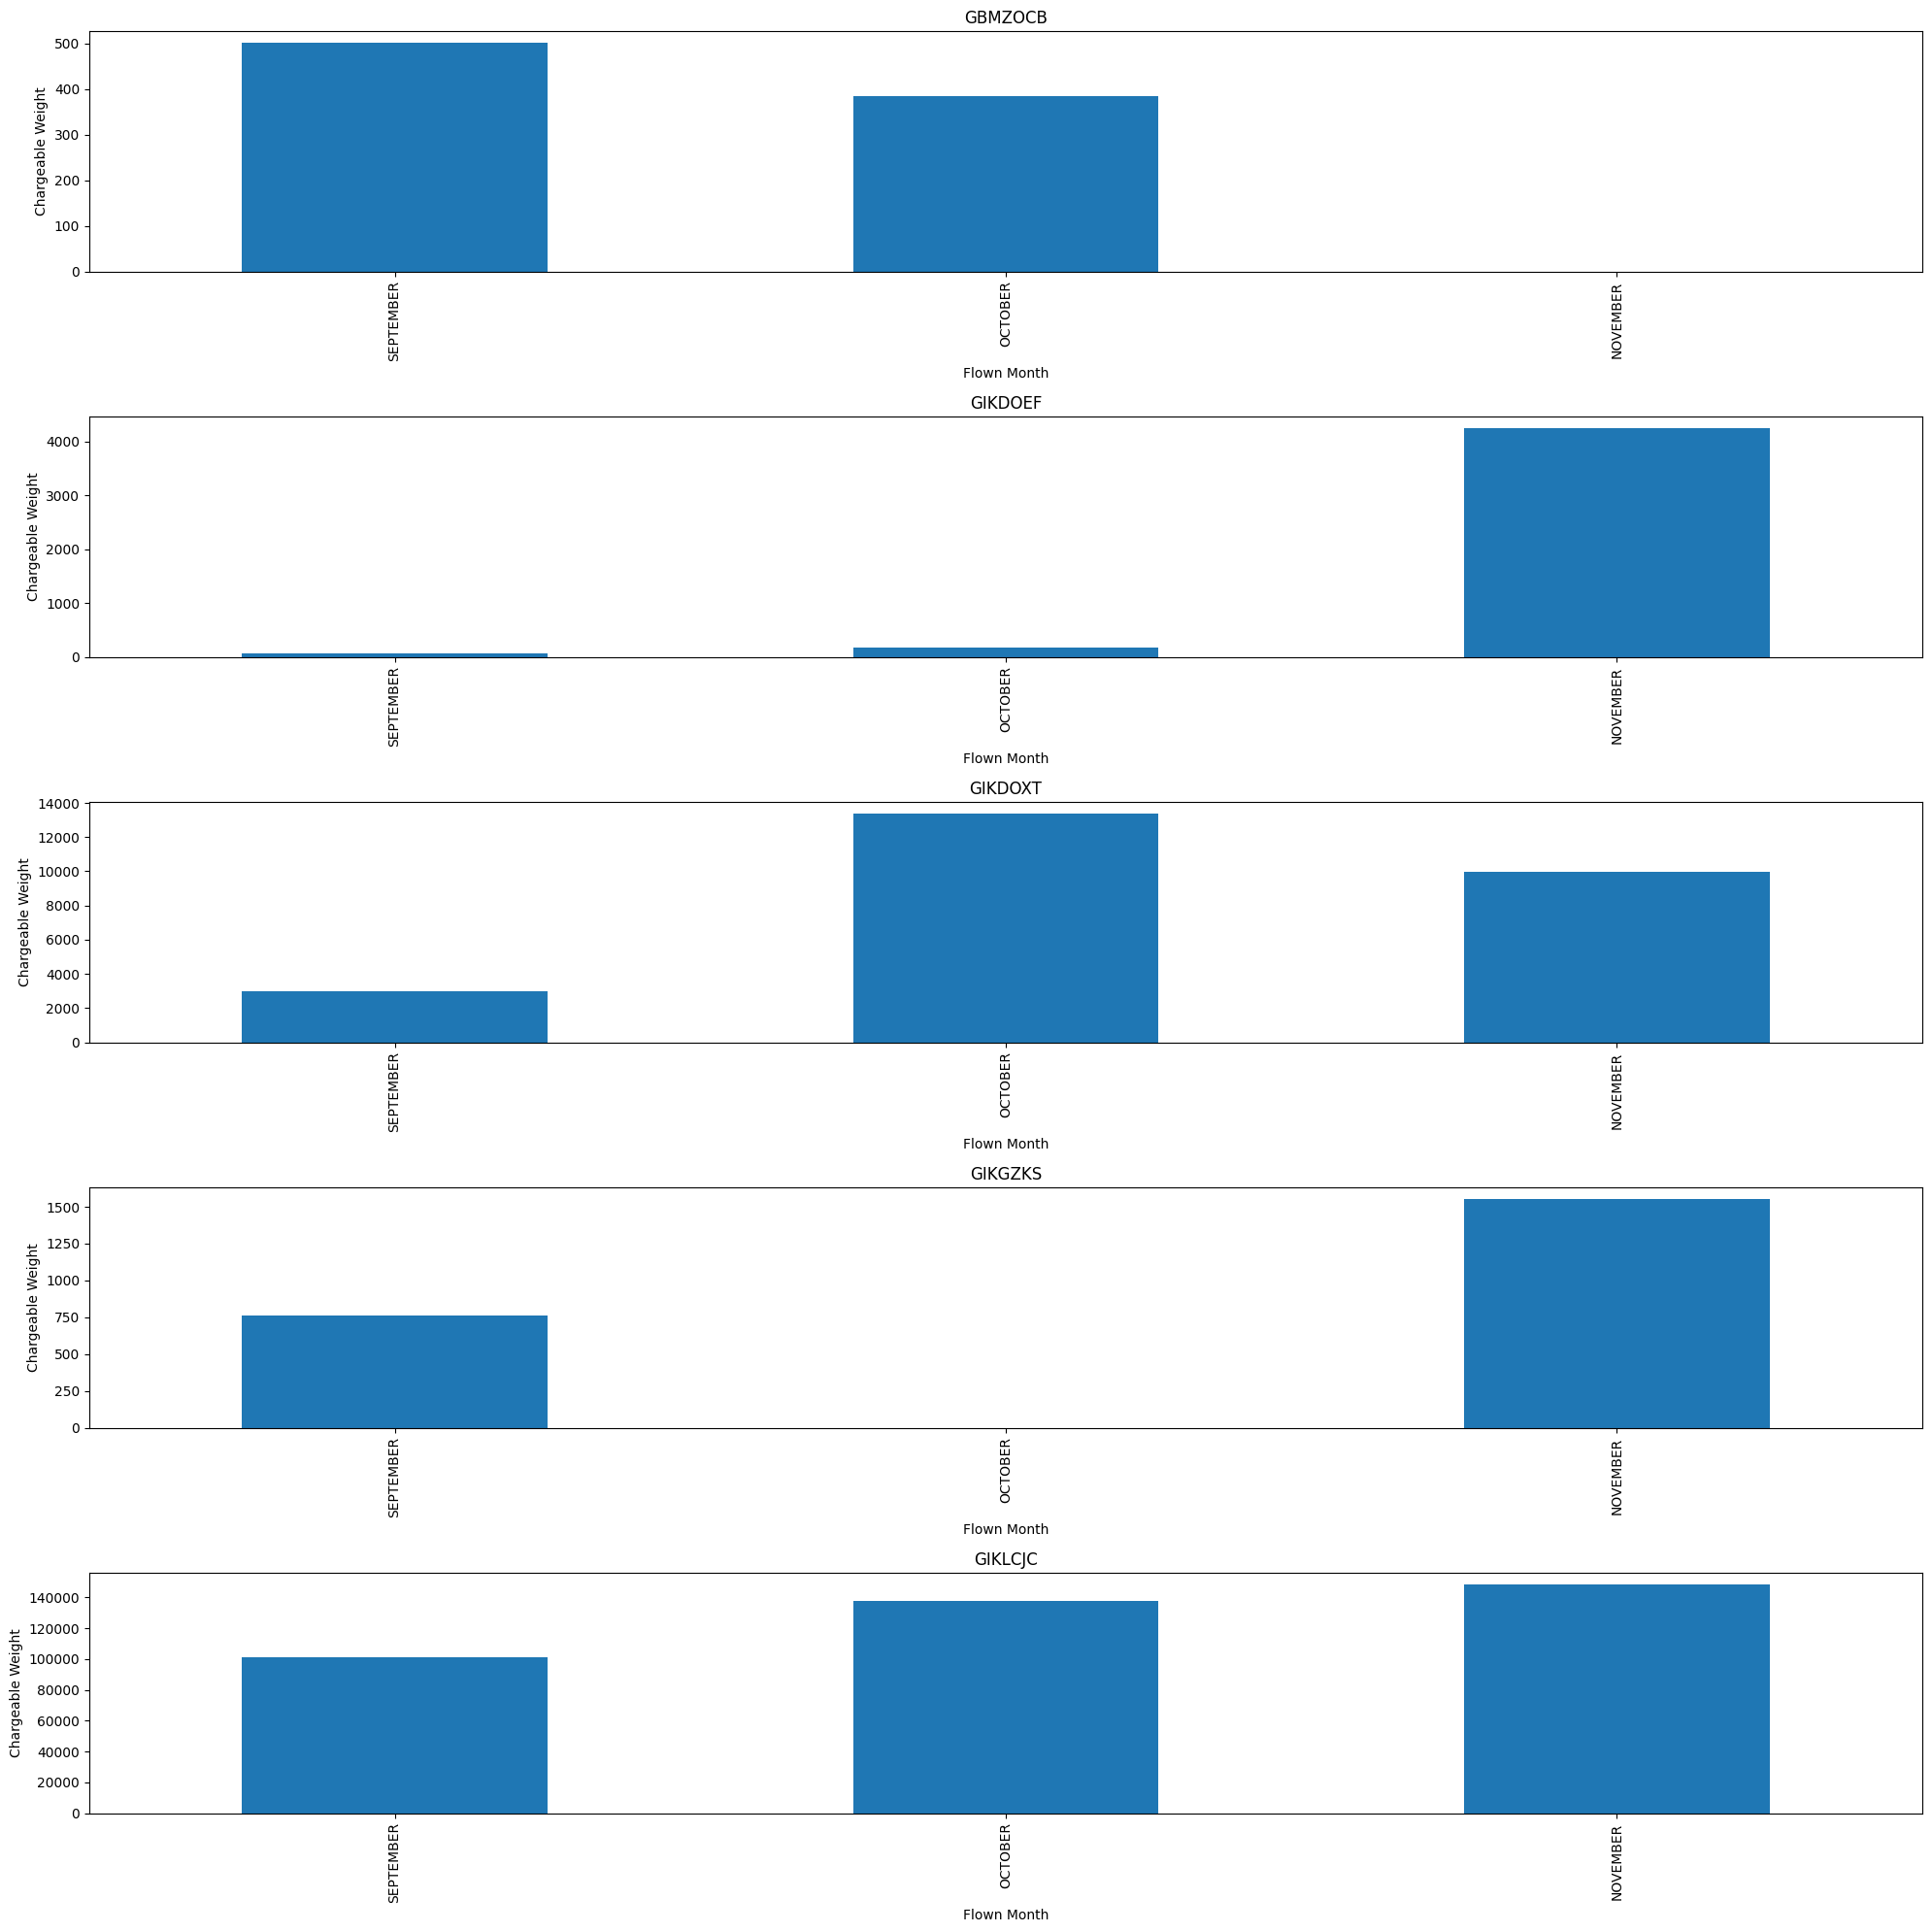

In [35]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent_code in enumerate(charge_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    charge_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.loc[agent_code].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent_code}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Chargeable Weight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [36]:
# Price
price_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH = top_10_price_per_month_per_agent.loc['GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH']

price_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentCode,,,
GBMZOCB,6.339920,20.841364,NaN
GIKDOEF,5.730159,1.096667,1.383882
GIKDOXT,0.736667,0.923335,0.946745
GIKGZKS,2.802235,NaN,2.321481
GIKLCJC,0.229516,0.263472,0.201134


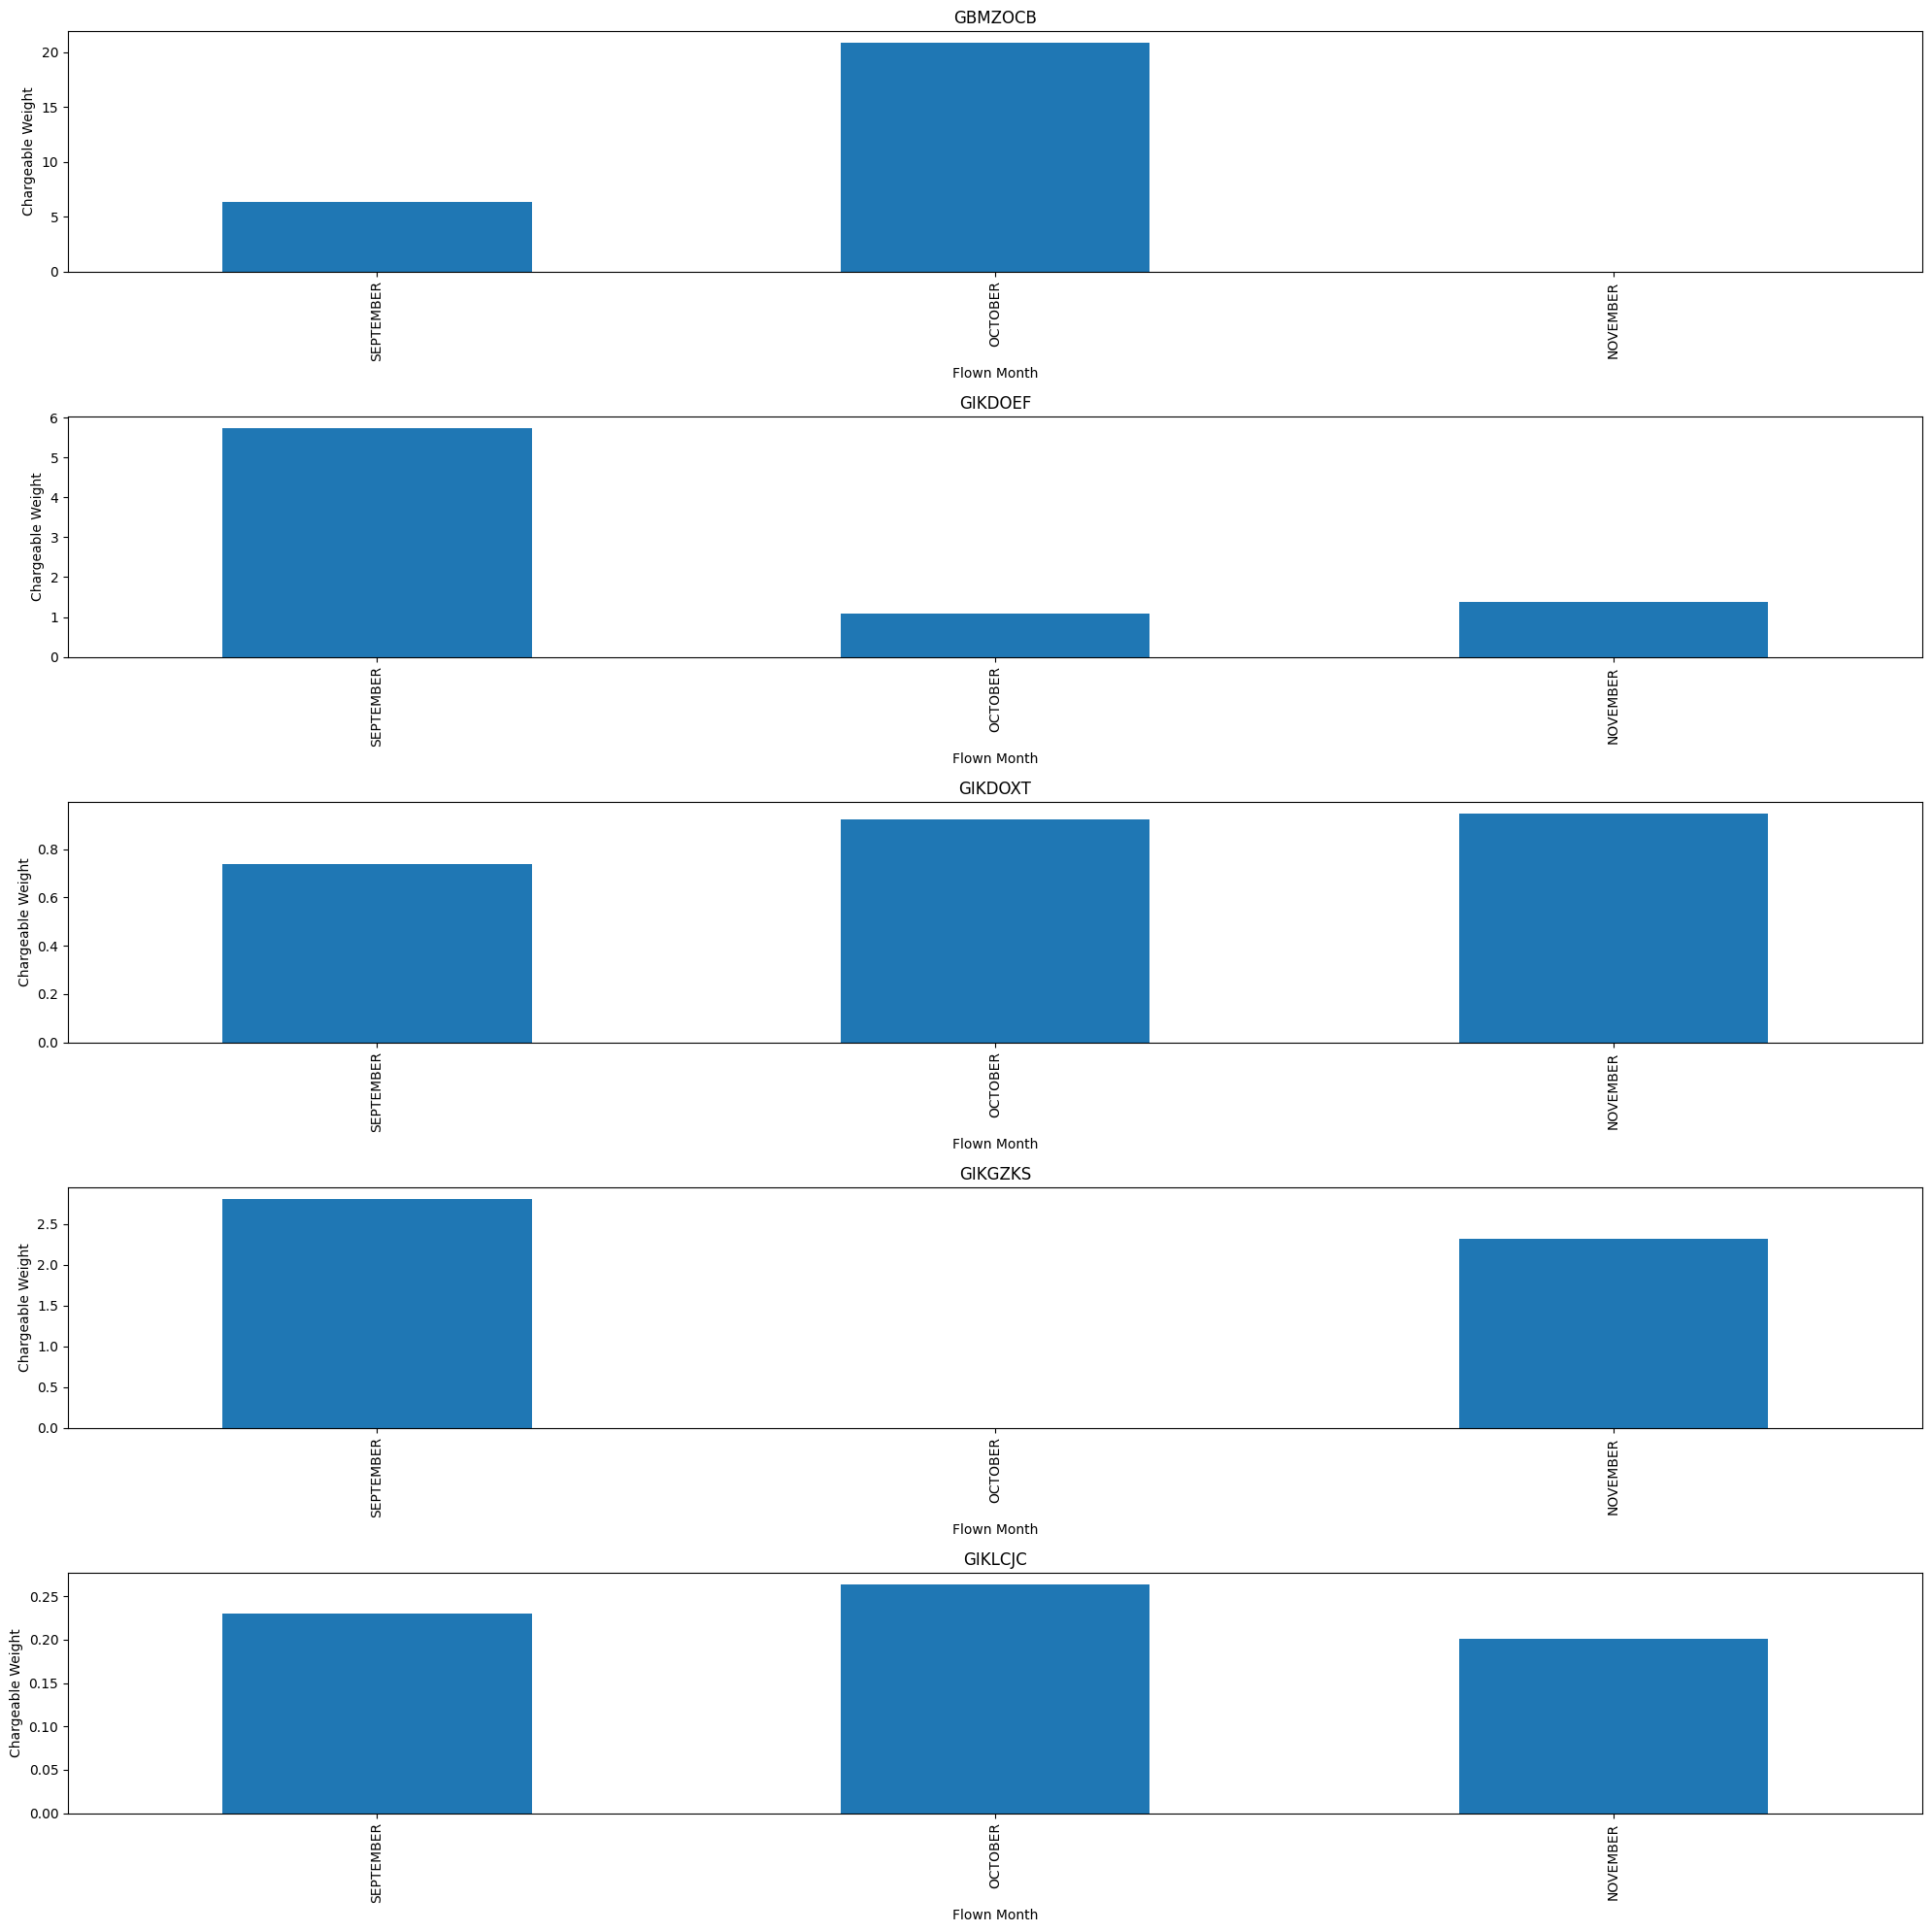

In [37]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent_code in enumerate(price_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    price_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.loc[agent_code].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent_code}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Chargeable Weight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [38]:
# Revenue
revenue_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH = top_10_revenue_per_month_per_agent.loc['GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH']

revenue_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
AgentCode,,,
GBMZOCB,3176.300000,2194.555000,NaN
GIKDOEF,47.500000,184.240000,740.720
GIKDOXT,2210.000000,2291.448000,2255.425
GIKGZKS,2131.100000,NaN,1802.050
GIKLCJC,478.094472,858.917382,751.213


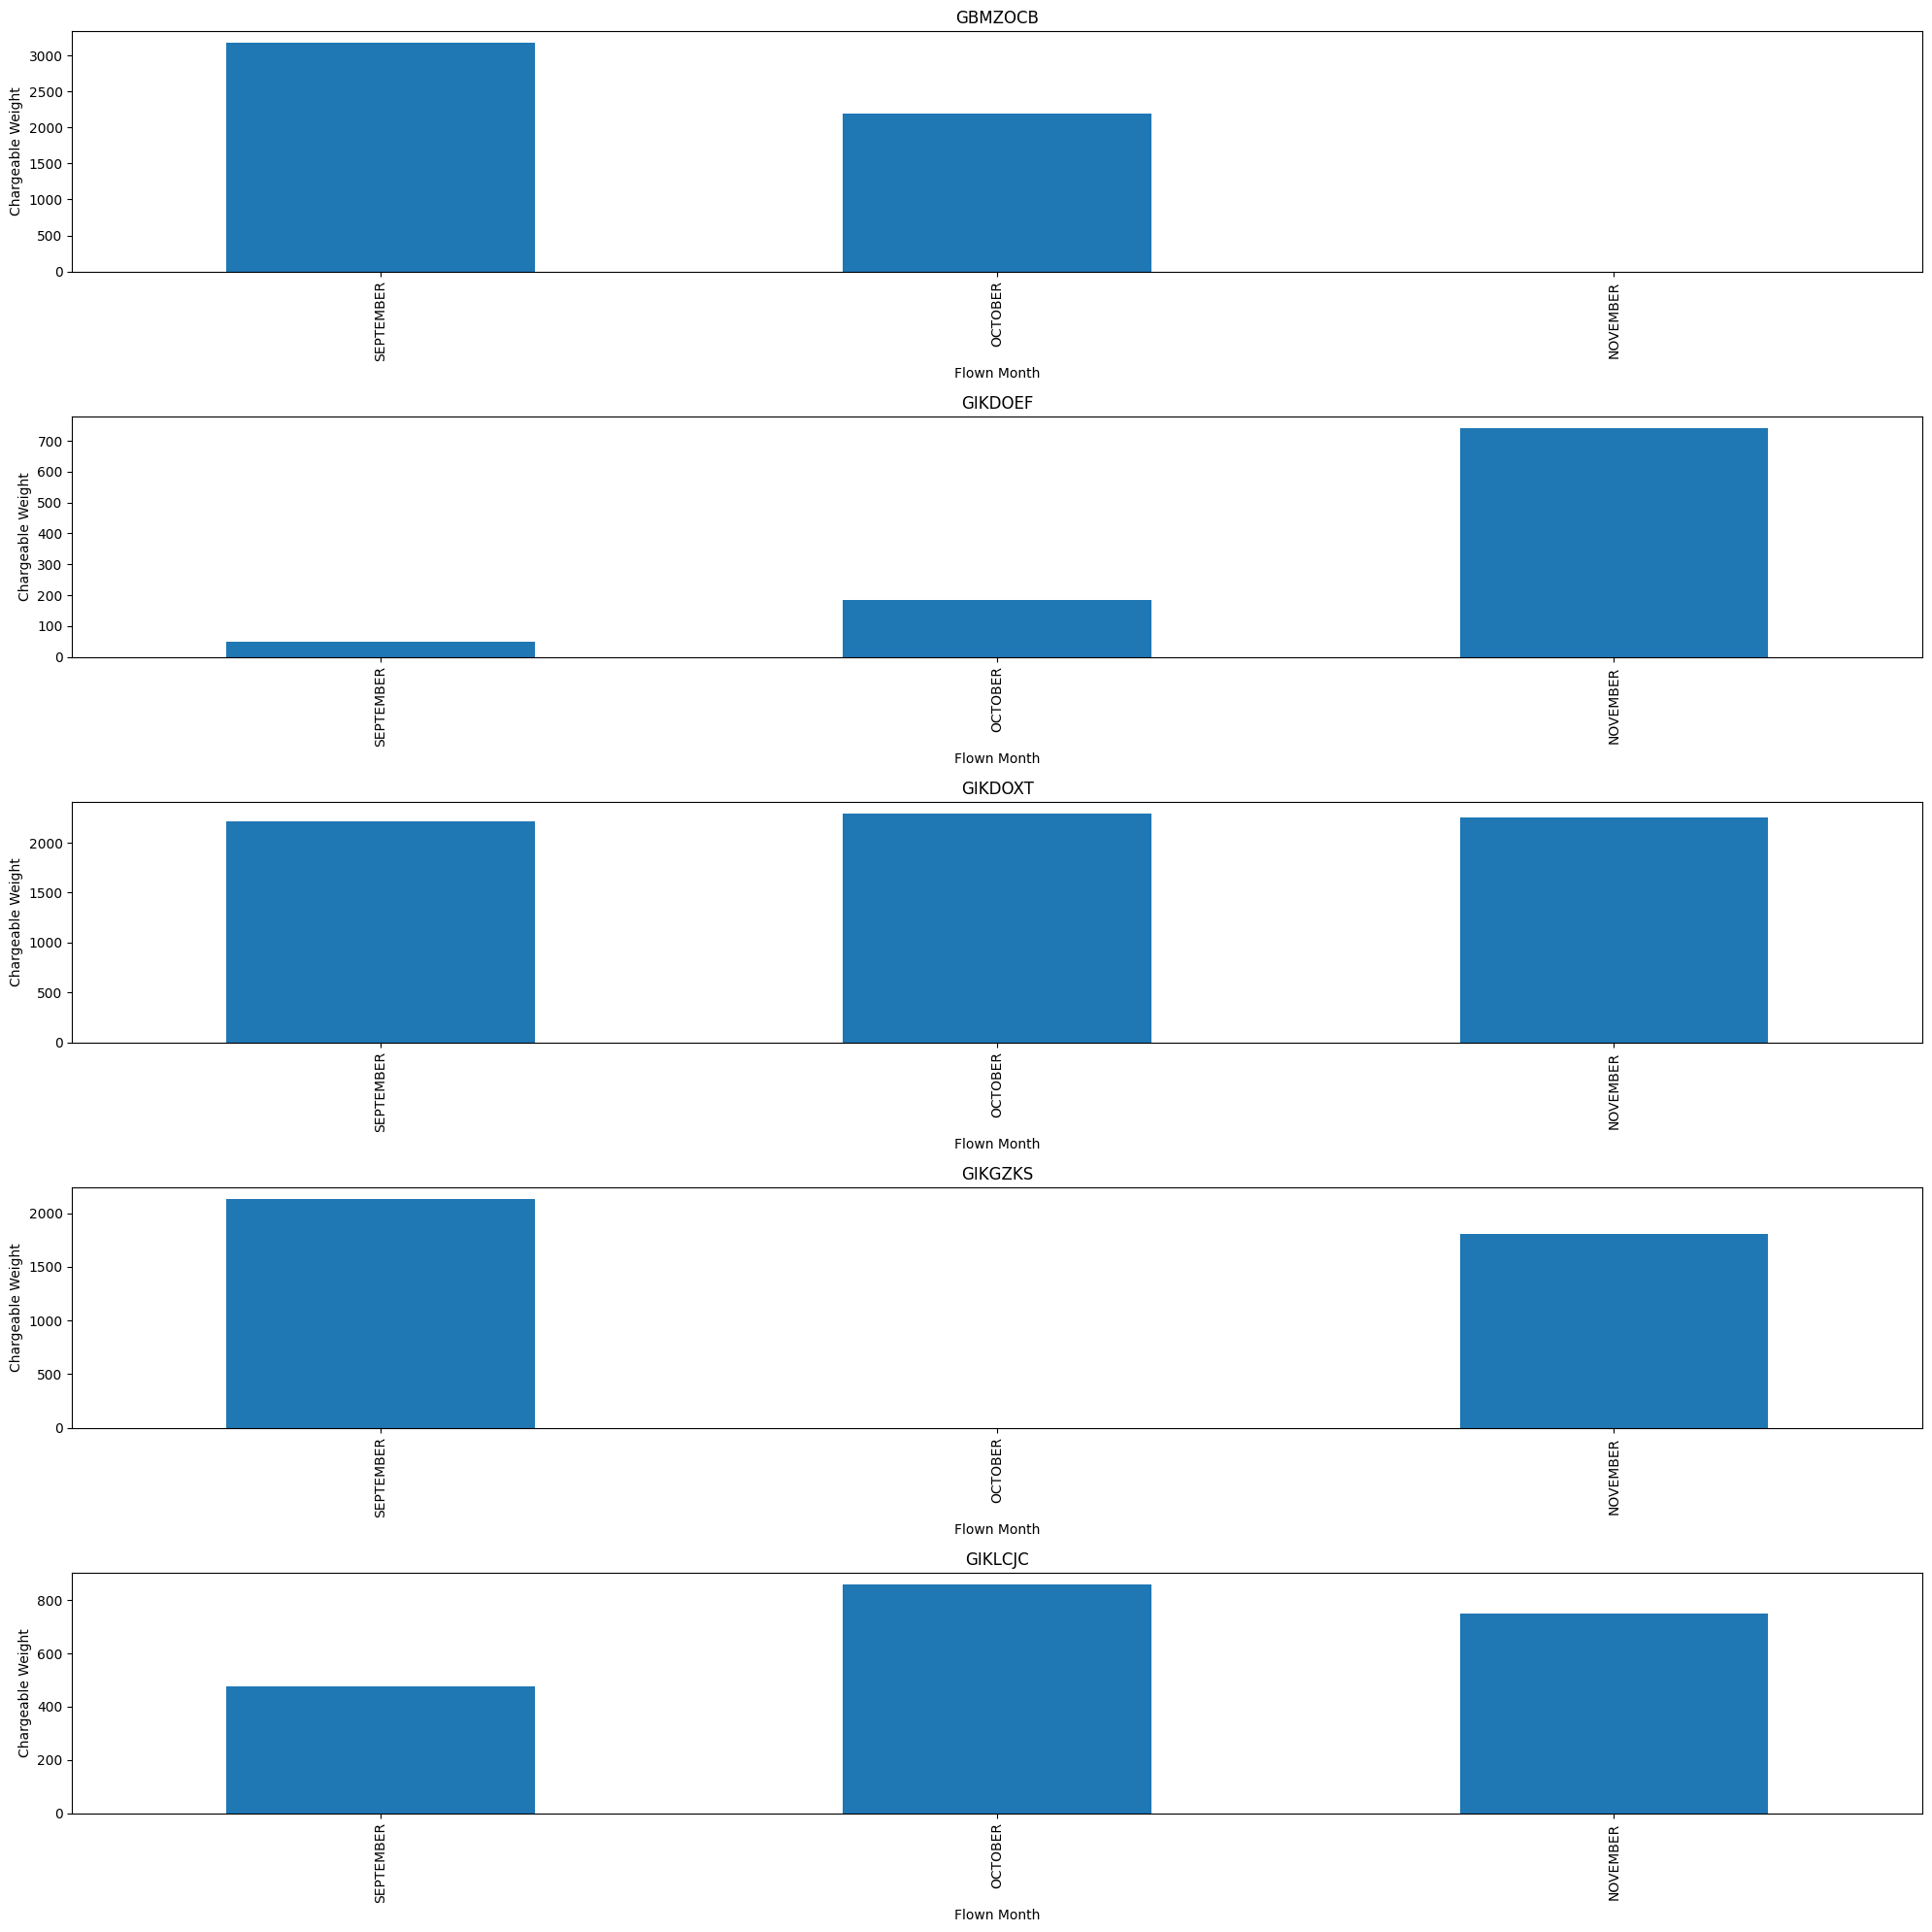

In [39]:
# Create the subplots (2 rows, 5 columns for 10 charts)
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, agent_code in enumerate(revenue_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    revenue_per_month_GIK3UOPAAZ0GNRKDSCIBJTJYDDMKEH.loc[agent_code].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{agent_code}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Chargeable Weight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

## Product code analysis

In [40]:
total_product_weight = data_for_analysis.groupby('ProductCode')['ChargeableWeight'].sum()
total_product_weight

,ChargeableWeight
ProductCode,
DLJ,11184623.1
MGK,4731531.0
MGV,47806.5
MNL,183.0
PCS,135.0
PEU,155926.5
RLT,4614.0
SDF,226.5
SJD,15922.5


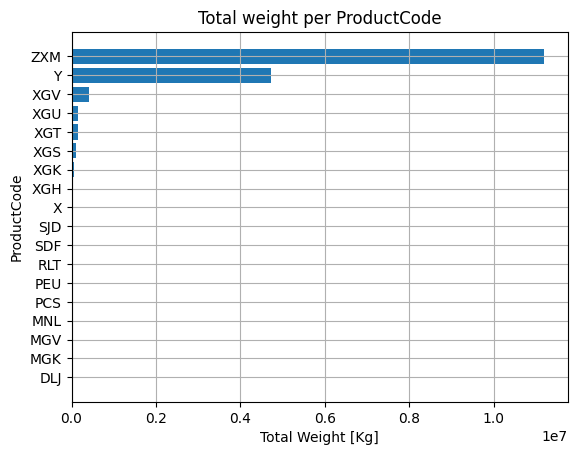

In [41]:
plt.barh(total_product_weight.index, total_product_weight.sort_values().values)
plt.xlabel('Total Weight [Kg]')
plt.ylabel('ProductCode')
plt.title('Total weight per ProductCode')
plt.grid()

In [42]:
total_product_weight_per_month = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['ChargeableWeight'].sum().unstack()
total_product_weight_per_month

<ipython-input-42-ca905382f156>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_product_weight_per_month = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['ChargeableWeight'].sum().unstack()


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
ProductCode,,,
DLJ,3922188.0,3906055.5,3356379.6
MGK,1242139.5,1667812.5,1821579.0
MGV,32878.5,4299.0,10629.0
MNL,0.0,183.0,0.0
PCS,0.0,0.0,135.0
PEU,4372.5,31776.0,119778.0
RLT,357.0,3363.0,894.0
SDF,0.0,0.0,226.5
SJD,0.0,0.0,15922.5


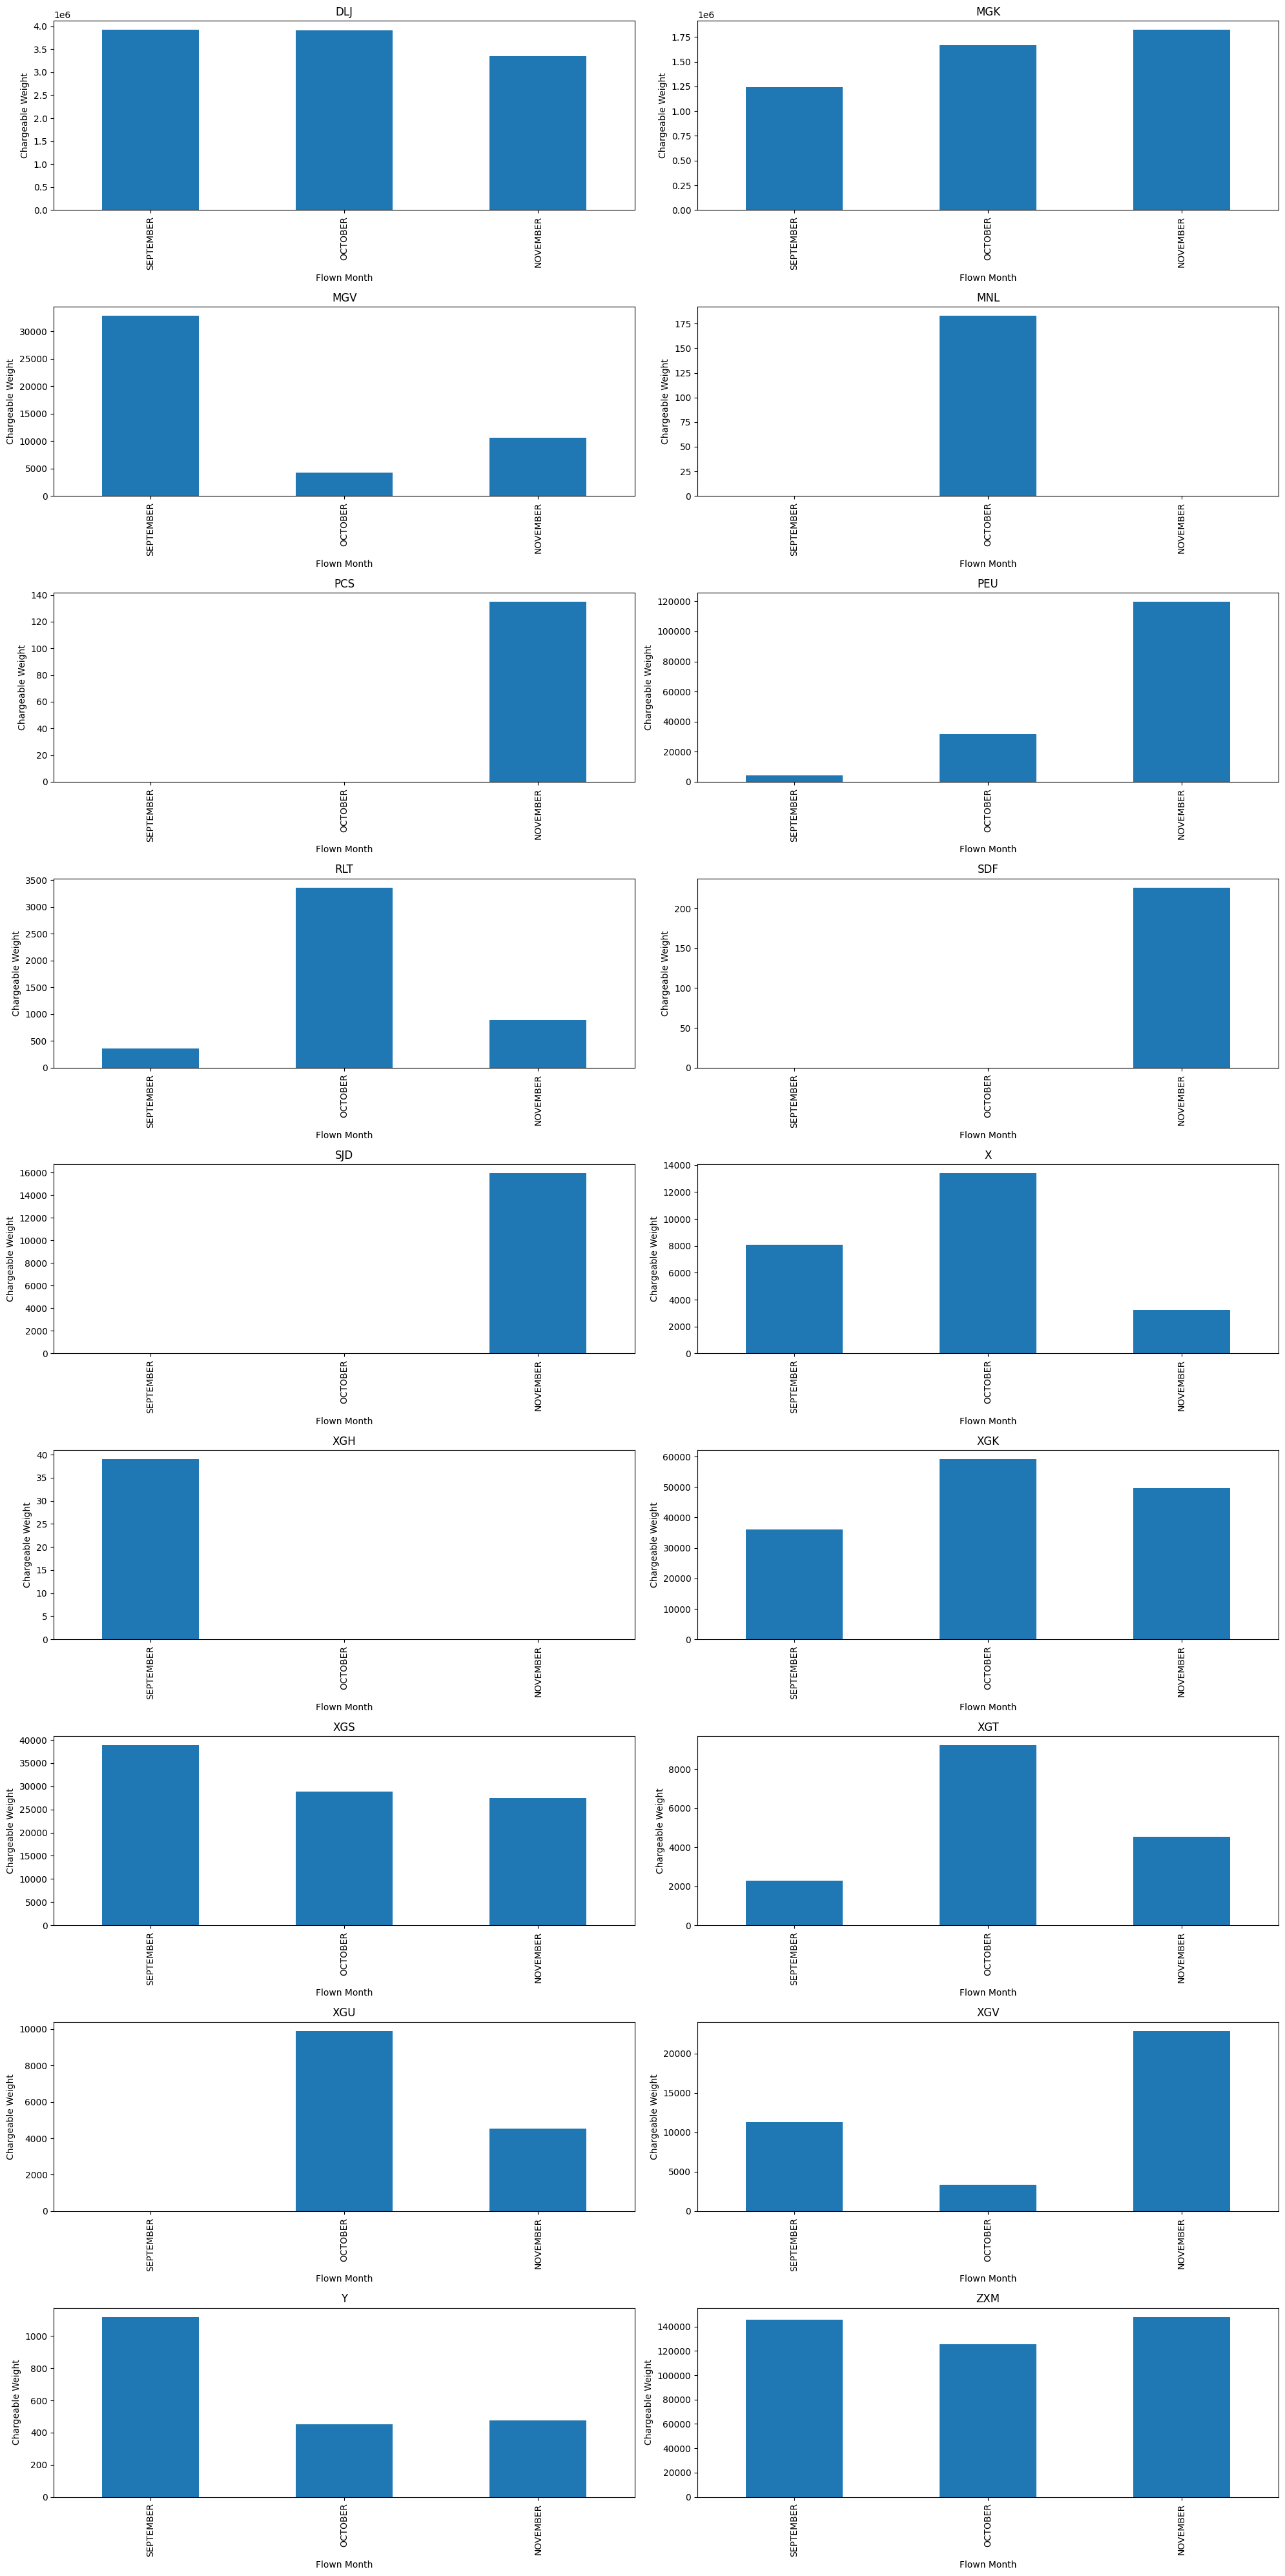

In [43]:
# Create the subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, product in enumerate(total_product_weight_per_month.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    total_product_weight_per_month.loc[product].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{product}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Chargeable Weight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [44]:
product_price_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Price [USD/Kg]'].mean().unstack()
product_price_mean

<ipython-input-44-56e113a655c0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_price_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Price [USD/Kg]'].mean().unstack()


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
ProductCode,,,
DLJ,10.337060,9.046296,8.082693
MGK,7.905764,15.710424,16.697713
MGV,57.554652,0.932158,0.892307
MNL,NaN,14.586667,NaN
PCS,NaN,NaN,0.366667
PEU,3.281050,8.773399,3.460501
RLT,0.475000,3.321212,0.966667
SDF,NaN,NaN,5.571852
SJD,NaN,NaN,44.158345


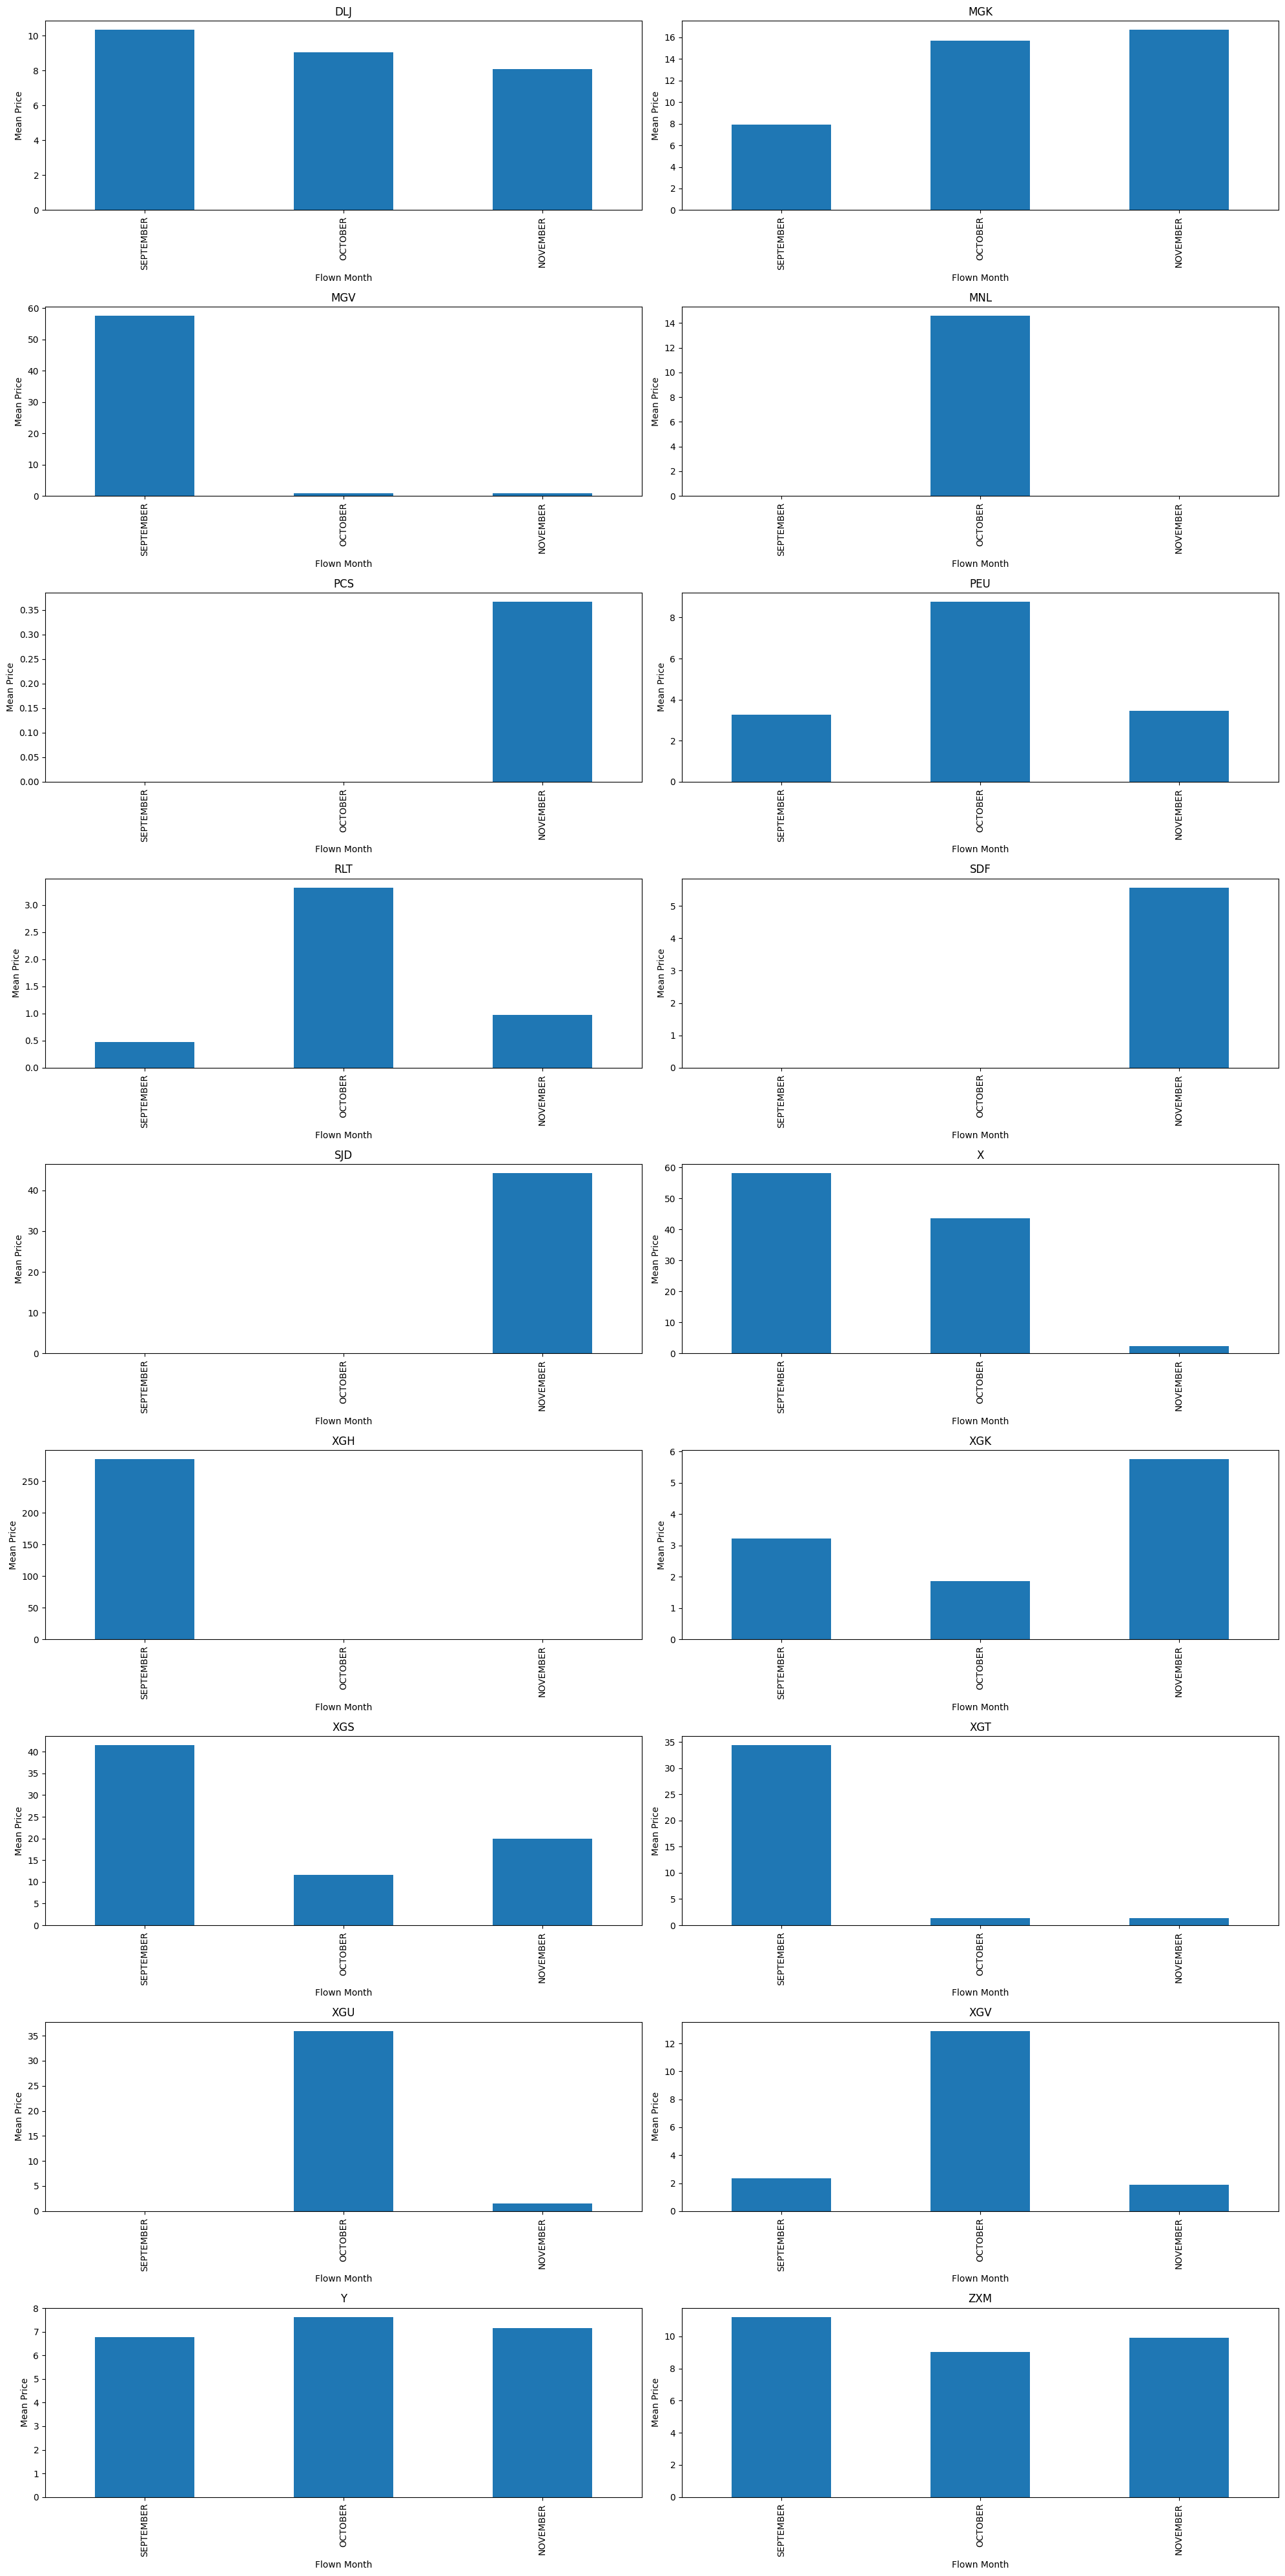

In [45]:
# Create the subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, product in enumerate(product_price_mean.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    product_price_mean.loc[product].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{product}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Mean Price')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [46]:
product_revenue_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Revenue'].mean().unstack()
product_revenue_mean

<ipython-input-46-4aa67b9fbdc1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_revenue_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Revenue'].mean().unstack()


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
ProductCode,,,
DLJ,4888.651387,4327.248522,5902.108919
MGK,17699.556991,40150.798438,41807.535779
MGV,11685.112857,537.850000,1037.662500
MNL,NaN,1814.665000,NaN
PCS,NaN,NaN,49.500000
PEU,1272.292857,3752.146875,9396.427273
RLT,37.950000,649.418182,273.000000
SDF,NaN,NaN,141.916667
SJD,NaN,NaN,4780.467571


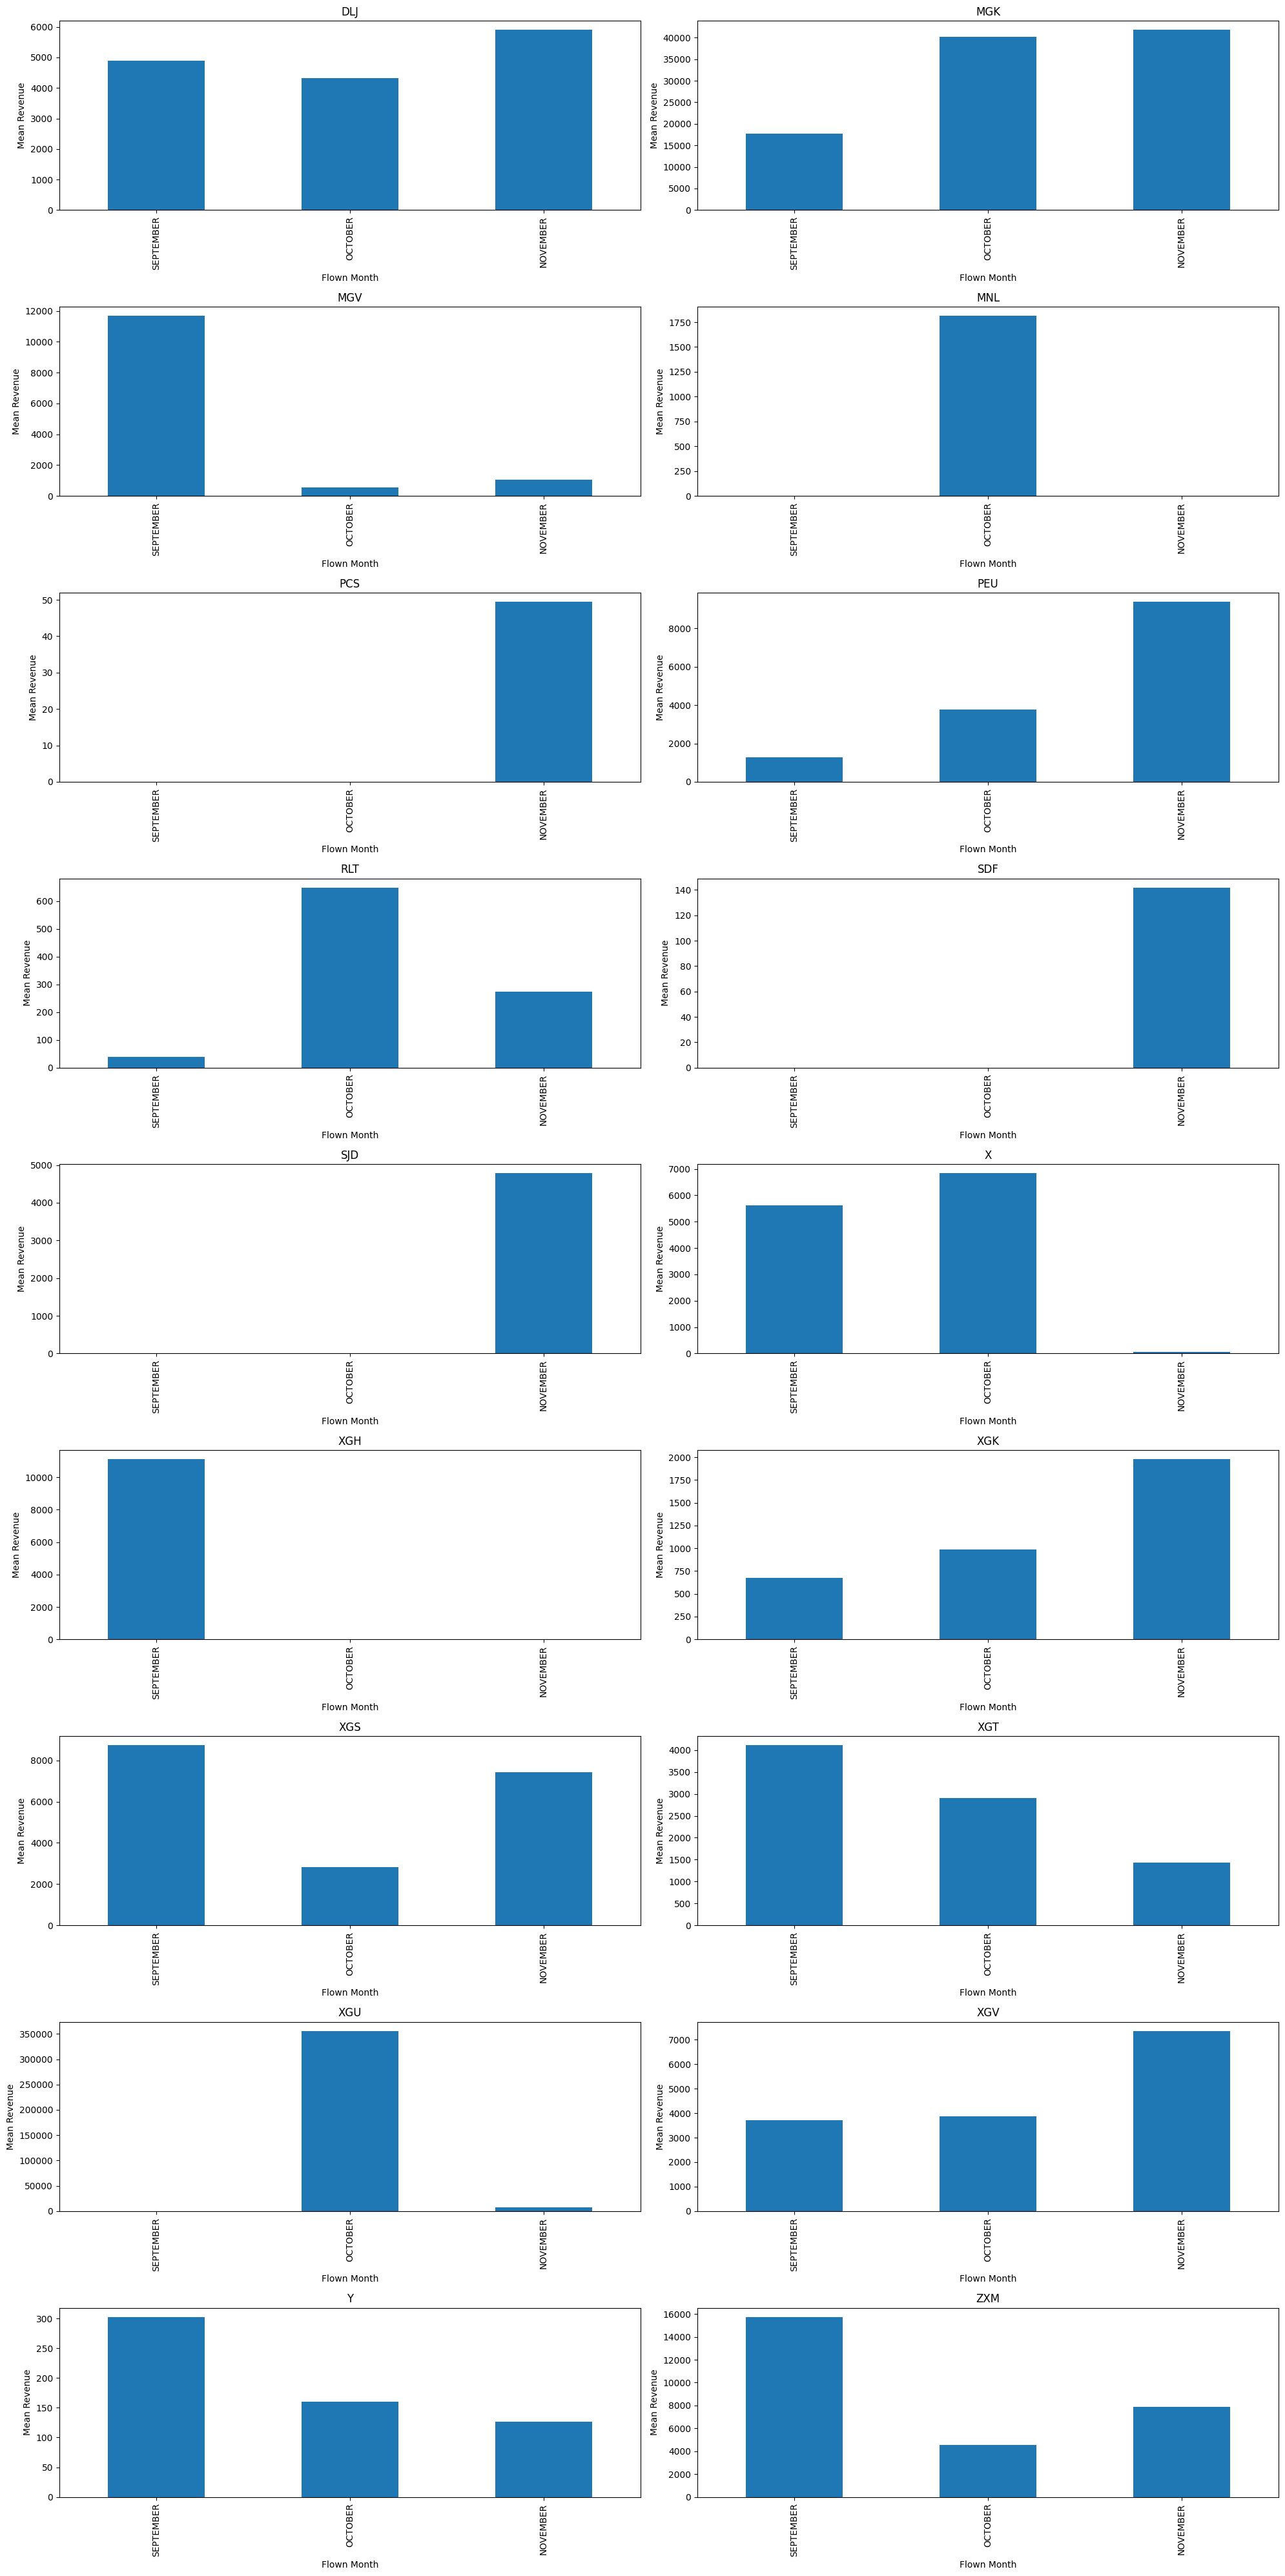

In [47]:
# Create the subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, product in enumerate(product_revenue_mean.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    product_revenue_mean.loc[product].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{product}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Mean Revenue')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [48]:
product_weight_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['ChargeableWeight'].mean().unstack()
product_weight_mean

<ipython-input-48-7e871fcfadd4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_weight_mean = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['ChargeableWeight'].mean().unstack()


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
ProductCode,,,
DLJ,3130.237829,2914.966791,2624.221736
MGK,1832.064159,2392.844333,2311.648477
MGV,4696.928571,859.800000,1771.500000
MNL,NaN,91.500000,NaN
PCS,NaN,NaN,135.000000
PEU,624.642857,1986.000000,10888.909091
RLT,89.250000,305.727273,223.500000
SDF,NaN,NaN,75.500000
SJD,NaN,NaN,227.464286


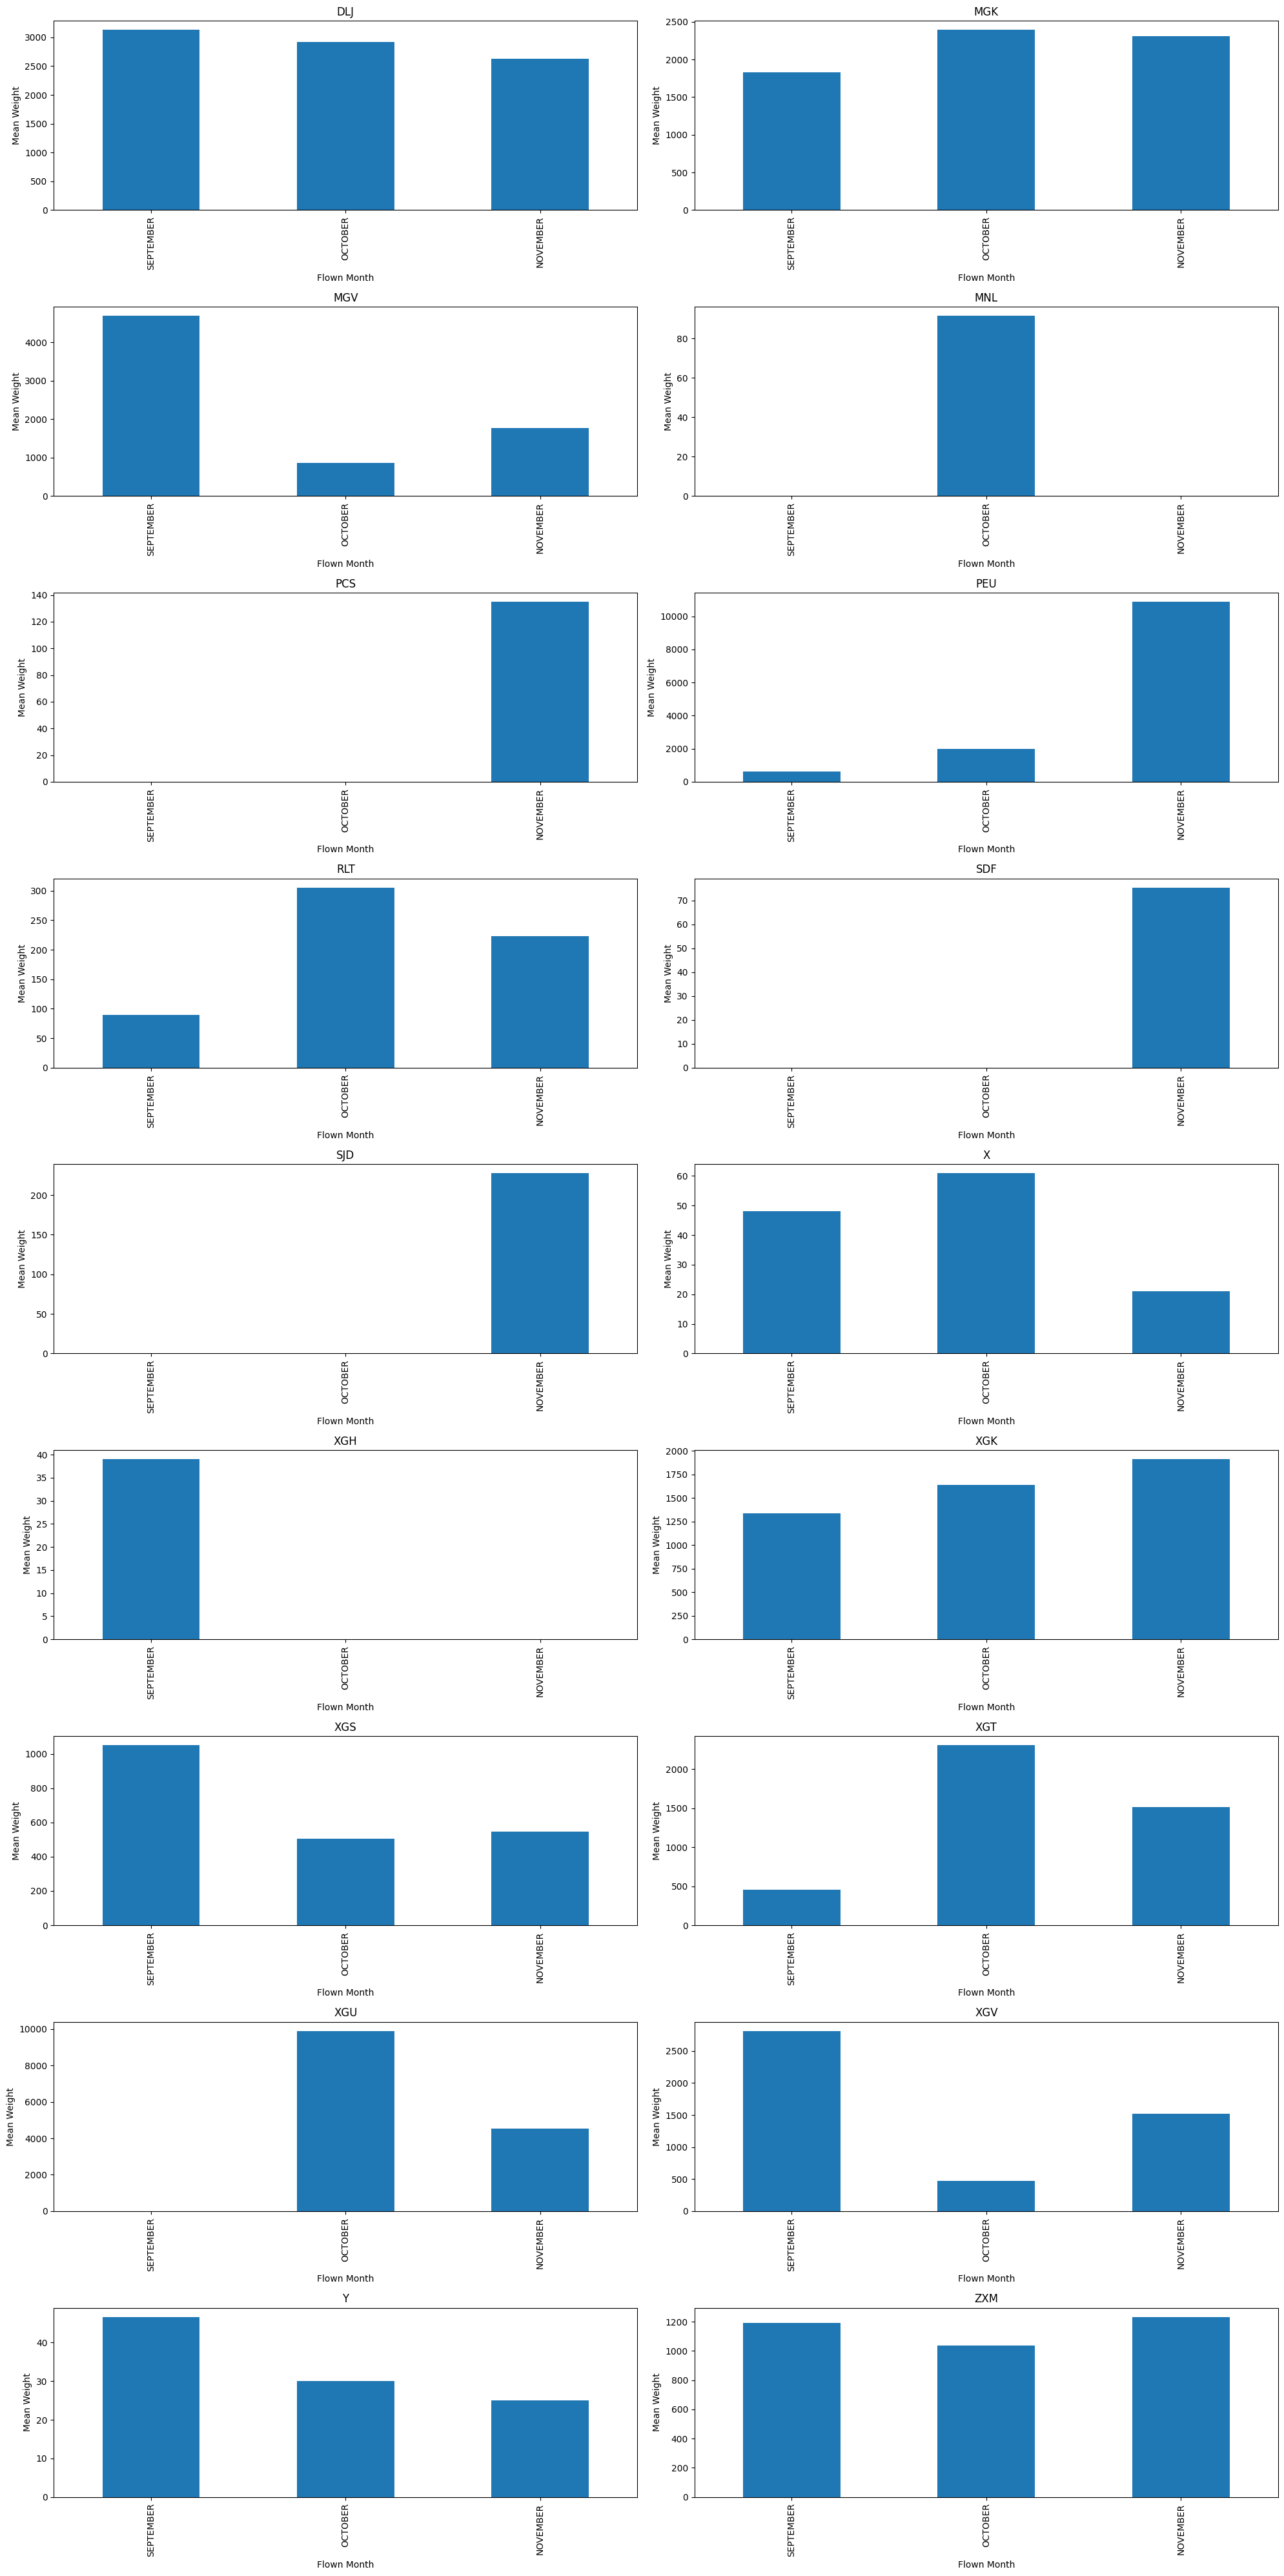

In [49]:
# Create the subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, product in enumerate(product_weight_mean.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    product_weight_mean.loc[product].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{product}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Mean Weight')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

In [50]:
product_pieces = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Pieces'].sum().unstack()
product_pieces

<ipython-input-50-462be2245af8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_pieces = data_for_analysis.groupby(['ProductCode', 'FlownMonth'])['Pieces'].sum().unstack()


FlownMonth,SEPTEMBER,OCTOBER,NOVEMBER
ProductCode,,,
DLJ,26600,23214,21800
MGK,21889,19958,35040
MGV,51,8,12
MNL,0,2,0
PCS,0,0,1
PEU,99,67,174
RLT,7,127,23
SDF,0,0,10
SJD,0,0,647


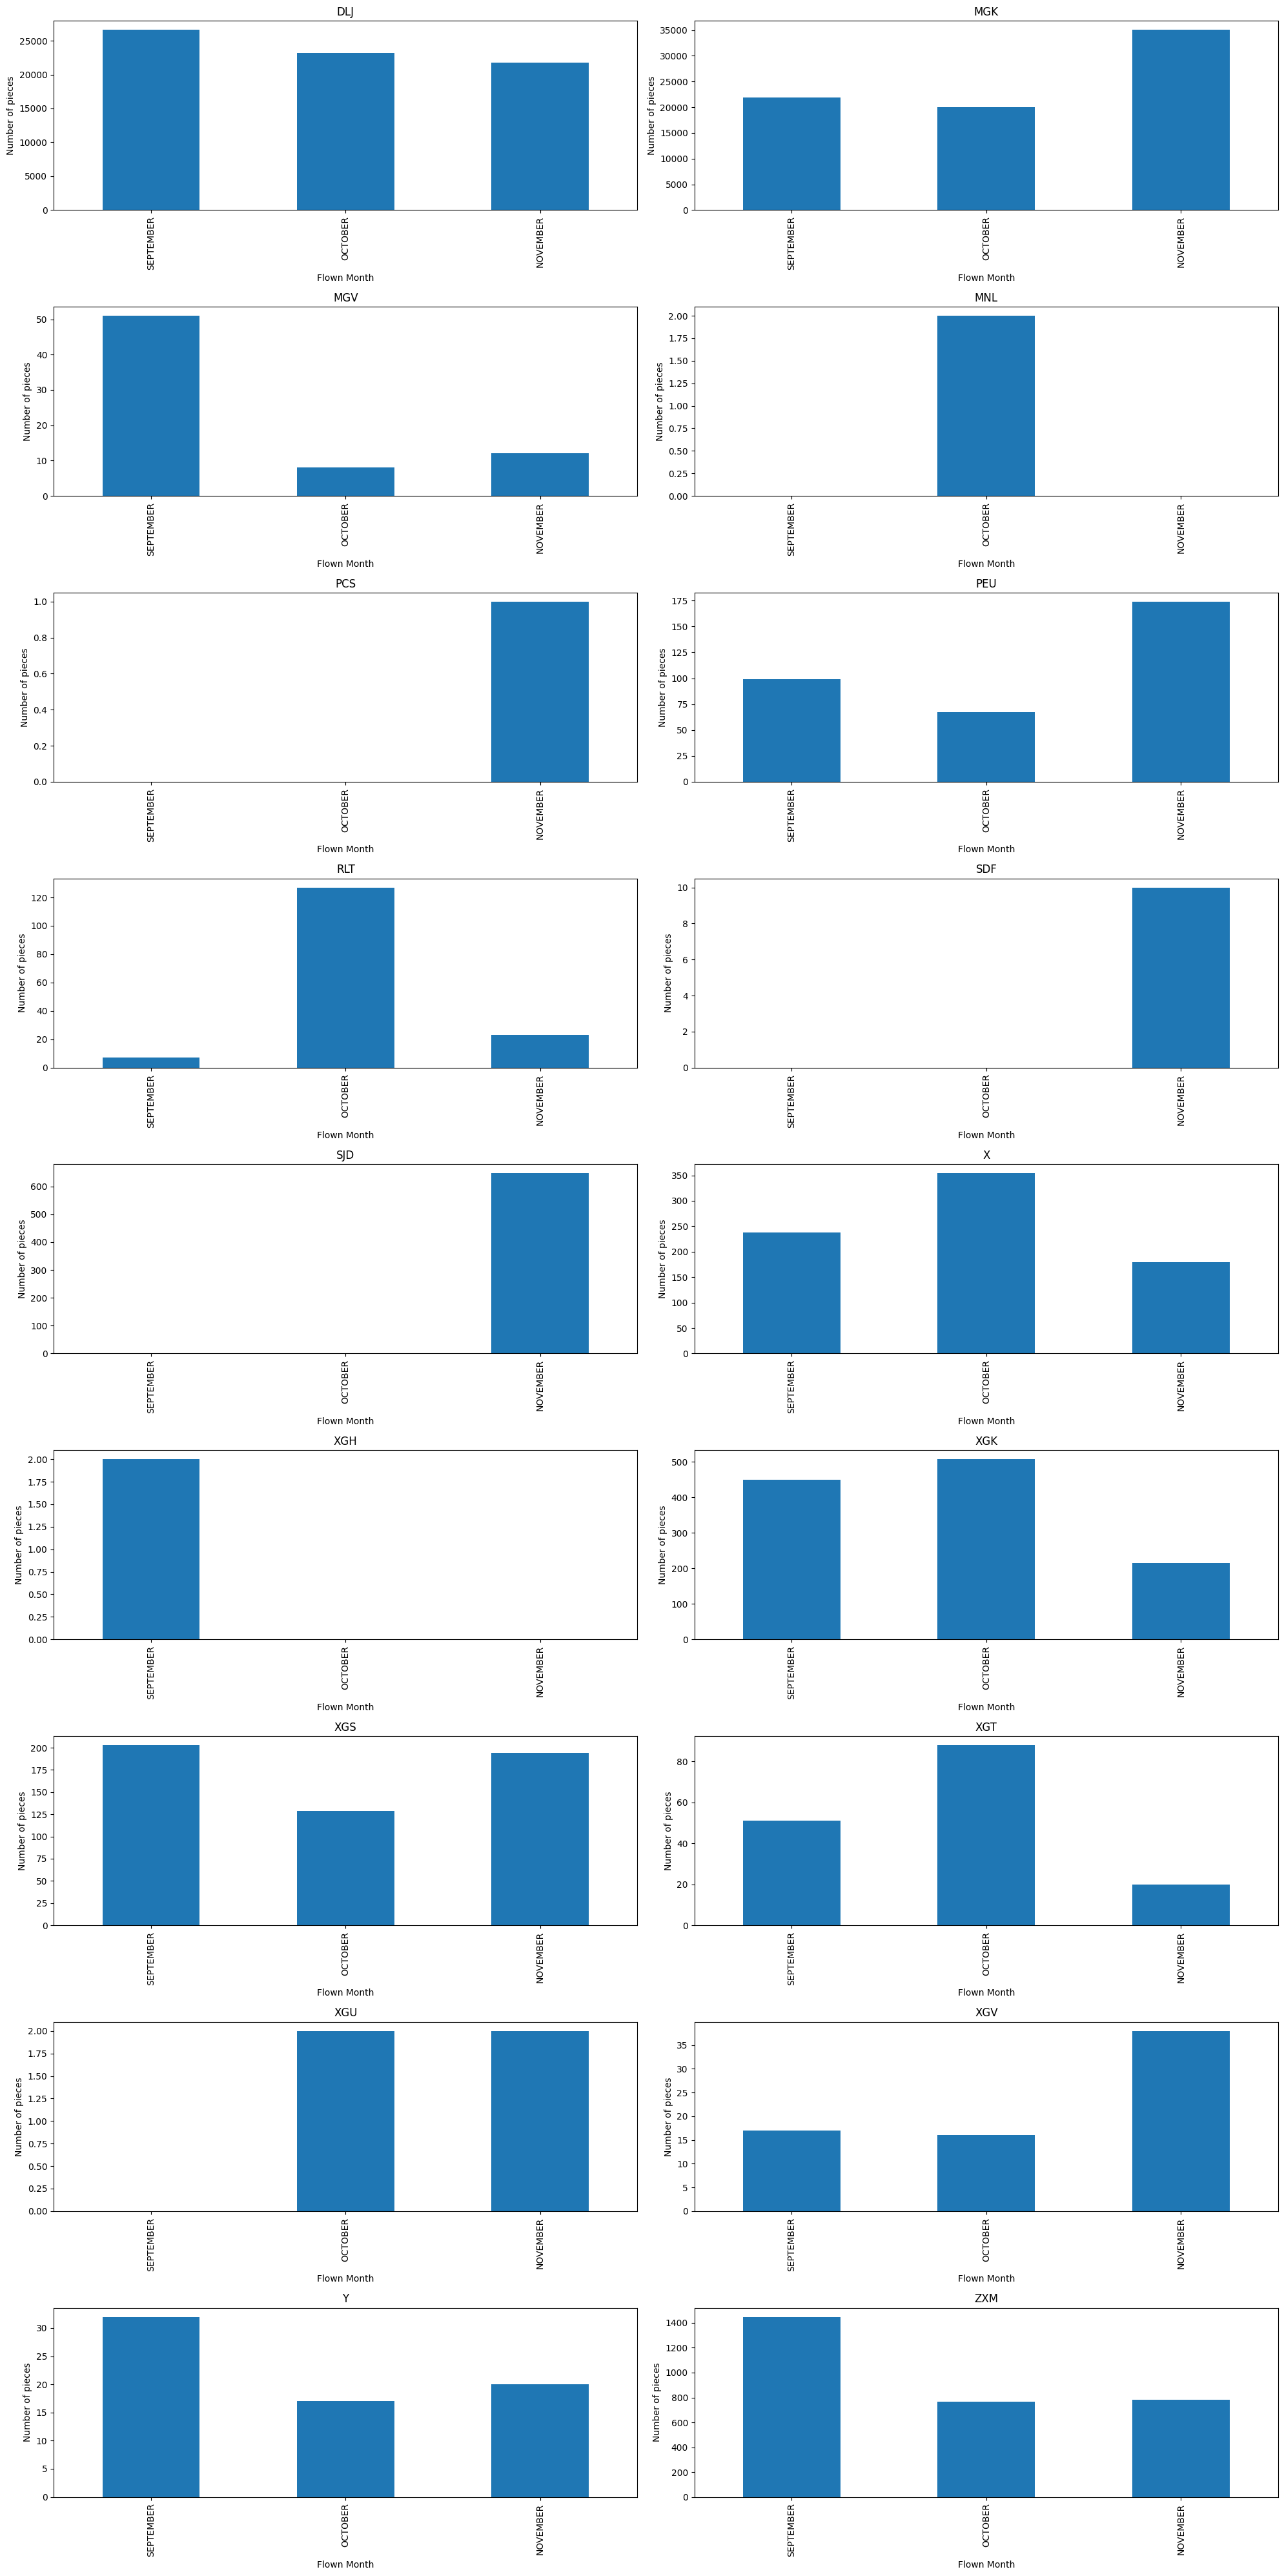

In [51]:
# Create the subplots
fig, axes = plt.subplots(9, 2, figsize=(20, 40))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, product in enumerate(product_pieces.index):
    # print("i", i)
    # print("agent", agent)

    ax = axes[i]

    # Plot bar chart for the current agent
    product_pieces.loc[product].plot(kind='bar', ax=ax)

    # Set title and labels
    ax.set_title(f'{product}')
    ax.set_xlabel('Flown Month')
    ax.set_ylabel('Number of pieces')

# # Adjust layout to prevent overlap
plt.tight_layout()

# # Show the plots
plt.show()

To conclude about the products, the number of pieces and weights transported between the months is quite changing and some items can be really expensive. We can also observe that the products with most pieces to transport and that are constantly shipped are usually the least expensive.

# 2. Model training

Using Python, implement an approach to train and validate a model that will predict the price by kilogram to be paid by the client, given shipment specificities.

Emphasis will be put on your implementation approach more than on the model performances.

The choice of the model is left to your appreciation. You are not expected to implement anything from scratch, and may use any framework you prefer (e.g. XGBoost, LightGBM, SKLearn, PyTorch, TensorFlow).

In [52]:
# Set the dataset
training_data = data_for_analysis.copy()
print(training_data.shape)
training_data.head()

(7420, 8)


,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,NOVEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,21.0,1,15.05,0.716667
1,SEPTEMBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,13.2,1,9.46,0.716667
2,SEPTEMBER,X,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,15.6,1,9.16,0.587179
3,OCTOBER,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,3.0,1,2.15,0.716667
4,SEPTEMBER,X,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,12.0,1,17.08,1.423333


In [53]:
training_data['FlownMonth'].unique()

['NOVEMBER', 'SEPTEMBER', 'OCTOBER']
Categories (3, object): ['SEPTEMBER' < 'OCTOBER' < 'NOVEMBER']

In [54]:
from sklearn.preprocessing import LabelEncoder

# Modify FlownMonth to numerical values
training_data['FlownMonth'] = training_data['FlownMonth'].cat.rename_categories({'SEPTEMBER': '9', 'OCTOBER': 10, 'NOVEMBER': 11})
training_data['FlownMonth'] = pd.to_numeric(training_data['FlownMonth'])

training_data.head()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,11,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,21.0,1,15.05,0.716667
1,9,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,13.2,1,9.46,0.716667
2,9,X,PJMIGRN,PJMIGWSX3CI1SROQTOOFWTJYDDMKEH,15.6,1,9.16,0.587179
3,10,X,SPRTQLS,SPRT4FP23CI1H34U12IFDORKMSBKLSW,3.0,1,2.15,0.716667
4,9,X,PBKDDPW,PBKDWYFR3DRTS3ZLNHTSGTJYDDMKEH,12.0,1,17.08,1.423333


In [55]:
# Modify the ProductCode, AgentCode, AgentName to numerical values
label_encoder = LabelEncoder()
training_data['ProductCode'] = label_encoder.fit_transform(training_data['ProductCode'])
training_data['AgentCode'] = label_encoder.fit_transform(training_data['AgentCode'])
training_data['AgentName'] = label_encoder.fit_transform(training_data['AgentName'])

training_data.head()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,11,9,497,498,21.0,1,15.05,0.716667
1,9,9,497,498,13.2,1,9.46,0.716667
2,9,9,420,426,15.6,1,9.16,0.587179
3,10,9,497,498,3.0,1,2.15,0.716667
4,9,9,403,413,12.0,1,17.08,1.423333


In [56]:
# Check the dataset
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7420 entries, 0 to 7419
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FlownMonth        7420 non-null   int64  
 1   ProductCode       7420 non-null   int64  
 2   AgentCode         7420 non-null   int64  
 3   AgentName         7420 non-null   int64  
 4   ChargeableWeight  7420 non-null   float64
 5   Pieces            7420 non-null   int64  
 6   Revenue           7420 non-null   float64
 7   Price [USD/Kg]    7420 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 463.9 KB


In [57]:
# round float values to 2
training_data = training_data.round(4)
training_data.head()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
0,11,9,497,498,21.0,1,15.05,0.7167
1,9,9,497,498,13.2,1,9.46,0.7167
2,9,9,420,426,15.6,1,9.16,0.5872
3,10,9,497,498,3.0,1,2.15,0.7167
4,9,9,403,413,12.0,1,17.08,1.4233


In [58]:
# Verify all values have the same amount of values as before

for col in data_for_analysis.columns:
    print(col, data_for_analysis[col].nunique())
    print(col, training_data[col].nunique())

FlownMonth 3
FlownMonth 3
ProductCode 18
ProductCode 18
AgentCode 679
AgentCode 679
AgentName 664
AgentName 664
ChargeableWeight 2358
ChargeableWeight 2358
Pieces 292
Pieces 292
Revenue 5475
Revenue 5475
Price [USD/Kg] 2862
Price [USD/Kg] 1951


## Outliers

### Chargeable weight

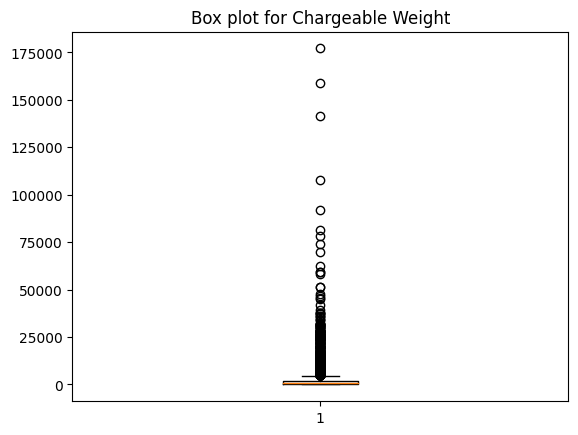

In [59]:
plt.boxplot(training_data['ChargeableWeight'])
plt.title('Box plot for Chargeable Weight')
plt.show()

Remove the 4 outliers from the training dataset

In [60]:
# Remove the 3 outliers from the training dataset
training_data_no_outlier = training_data[training_data['ChargeableWeight'] < 100000]
training_data_no_outlier.shape

(7416, 8)

### Pieces

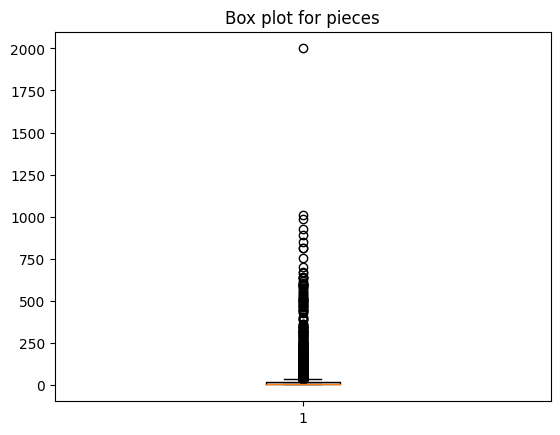

In [61]:
plt.boxplot(training_data['Pieces'])
plt.title('Box plot for pieces')
plt.show()

In [62]:
# Remove the outlier of the Pieces
training_data_no_outlier = training_data_no_outlier[training_data_no_outlier['Pieces'] < 1250]
training_data_no_outlier.shape

(7415, 8)

### Revenue

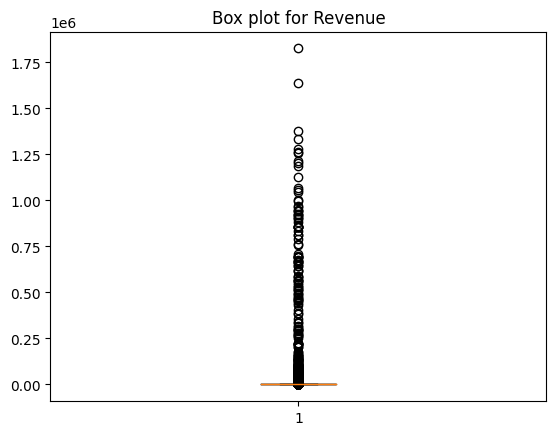

In [63]:
plt.boxplot(training_data['Revenue'])
plt.title('Box plot for Revenue')
plt.show()

In [64]:
# Remove the 2 outliers in Revenue
# training_data_no_outlier = training_data_no_outlier[training_data_no_outlier['Revenue'] < 1500000]
# training_data_no_outlier.shape

### Price

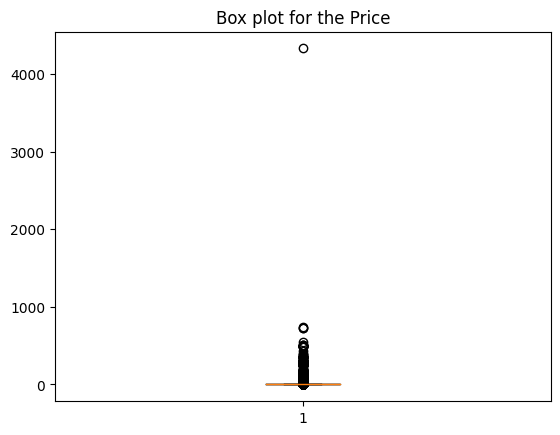

In [65]:
plt.boxplot(training_data['Price [USD/Kg]'])
plt.title('Box plot for the Price')
plt.show()

In [66]:
# Remove the outlier in Price
training_data_no_outlier = training_data_no_outlier[training_data_no_outlier['Price [USD/Kg]'] < 1000]
training_data_no_outlier.shape

(7414, 8)

## Split the dataset

In [67]:
from sklearn.model_selection import train_test_split

# Set the features and the target datasets
X_training_data = training_data_no_outlier.drop(columns=['Price [USD/Kg]'])
y_training_data = training_data_no_outlier['Price [USD/Kg]']

print(X_training_data.shape)
print(y_training_data.shape)

# Split the dataset in train, valid and test
X_train, X_test, y_train, y_test = train_test_split(X_training_data, y_training_data, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7414, 7)
(7414,)
(5931, 7)
(5931,)
(1483, 7)
(1483,)


## Model training

Step by step method:
- Regression model
- Overfitting so implementation of early stopping
- Improvement with removing outliers

### Gradient Boost Regression

In [68]:
import time
from sklearn.ensemble import GradientBoostingRegressor

params = dict(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)

gbm_full = GradientBoostingRegressor(**params)
gbm_early_stopping = GradientBoostingRegressor(
    **params,
    validation_fraction=0.1,
    n_iter_no_change=10,
)

start_time = time.time()
gbm_full.fit(X_train, y_train)
training_time_full = time.time() - start_time
n_estimators_full = gbm_full.n_estimators_

start_time = time.time()
gbm = gbm_early_stopping.fit(X_train, y_train) # Model used for evaluation
training_time_early_stopping = time.time() - start_time
estimators_early_stopping = gbm_early_stopping.n_estimators_

In [70]:
from sklearn.metrics import mean_squared_error

train_errors_without = []
val_errors_without = []

train_errors_with = []
val_errors_with = []

for i, (train_pred, test_pred) in enumerate(
    zip(
        gbm_full.staged_predict(X_train),
        gbm_full.staged_predict(X_test),
    )
):
    train_errors_without.append(mean_squared_error(y_train, train_pred))
    val_errors_without.append(mean_squared_error(y_test, test_pred))

for i, (train_pred, test_pred) in enumerate(
    zip(
        gbm_early_stopping.staged_predict(X_train),
        gbm_early_stopping.staged_predict(X_test),
    )
):
    train_errors_with.append(mean_squared_error(y_train, train_pred))
    val_errors_with.append(mean_squared_error(y_test, test_pred))

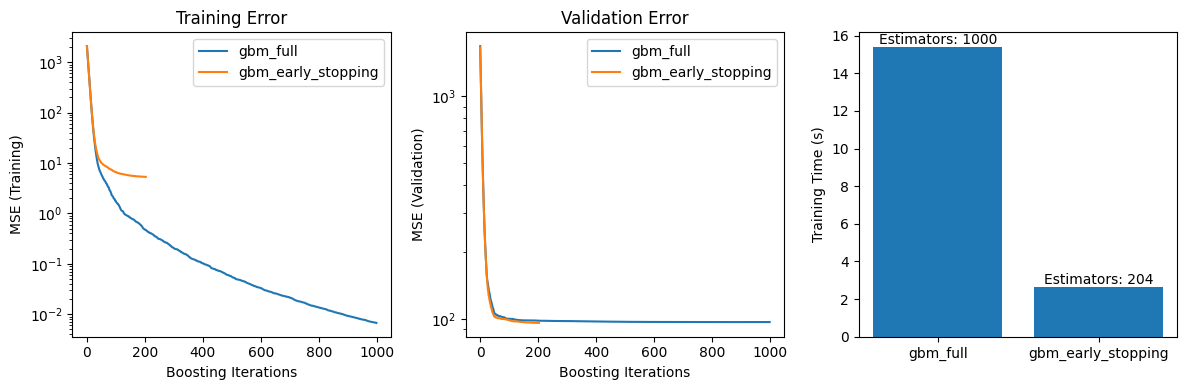

In [71]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

axes[0].plot(train_errors_without, label="gbm_full")
axes[0].plot(train_errors_with, label="gbm_early_stopping")
axes[0].set_xlabel("Boosting Iterations")
axes[0].set_ylabel("MSE (Training)")
axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_title("Training Error")

axes[1].plot(val_errors_without, label="gbm_full")
axes[1].plot(val_errors_with, label="gbm_early_stopping")
axes[1].set_xlabel("Boosting Iterations")
axes[1].set_ylabel("MSE (Validation)")
axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_title("Validation Error")

training_times = [training_time_full, training_time_early_stopping]
labels = ["gbm_full", "gbm_early_stopping"]
bars = axes[2].bar(labels, training_times)
axes[2].set_ylabel("Training Time (s)")

for bar, n_estimators in zip(bars, [n_estimators_full, estimators_early_stopping]):
    height = bar.get_height()
    axes[2].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.001,
        f"Estimators: {n_estimators}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, test_pred)
print("MSE (Test):", mse_test)

# Calculate the RMSE
rmse_test = root_mean_squared_error(y_test, test_pred)
print("RMSE (Test):", rmse_test)

# Calculate the MAE
mae_test = mean_absolute_error(y_test, test_pred)
print("MAE (Test):", mae_test)

# Calculate the R-squared score
r2_test = r2_score(y_test, test_pred)
print("R-squared (Test):", r2_test)


MSE (Test): 96.20139801531104
RMSE (Test): 9.808231135903712
MAE (Test): 1.3253239657970899
R-squared (Test): 0.950642680888603


### XGBoost

In [73]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, max_depth=5,
                         learning_rate=0.1, early_stopping_rounds=10)
model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-rmse:45.82657	validation_1-rmse:40.76725
[1]	validation_0-rmse:42.02358	validation_1-rmse:37.82661
[2]	validation_0-rmse:38.36444	validation_1-rmse:34.98653
[3]	validation_0-rmse:35.10845	validation_1-rmse:32.34592
[4]	validation_0-rmse:32.14676	validation_1-rmse:30.02943
[5]	validation_0-rmse:29.52221	validation_1-rmse:27.96210
[6]	validation_0-rmse:27.14700	validation_1-rmse:26.11340
[7]	validation_0-rmse:25.00366	validation_1-rmse:24.42529
[8]	validation_0-rmse:23.10310	validation_1-rmse:22.94207
[9]	validation_0-rmse:21.30243	validation_1-rmse:21.55319
[10]	validation_0-rmse:19.71229	validation_1-rmse:20.50595
[11]	validation_0-rmse:18.21382	validation_1-rmse:19.39708
[12]	validation_0-rmse:16.82667	validation_1-rmse:18.46784
[13]	validation_0-rmse:15.58791	validation_1-rmse:17.48327
[14]	validation_0-rmse:14.43842	validation_1-rmse:16.79729
[15]	validation_0-rmse:13.42765	validation_1-rmse:16.04013
[16]	validation_0-rmse:12.45013	validation_1-rmse:15.55123
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

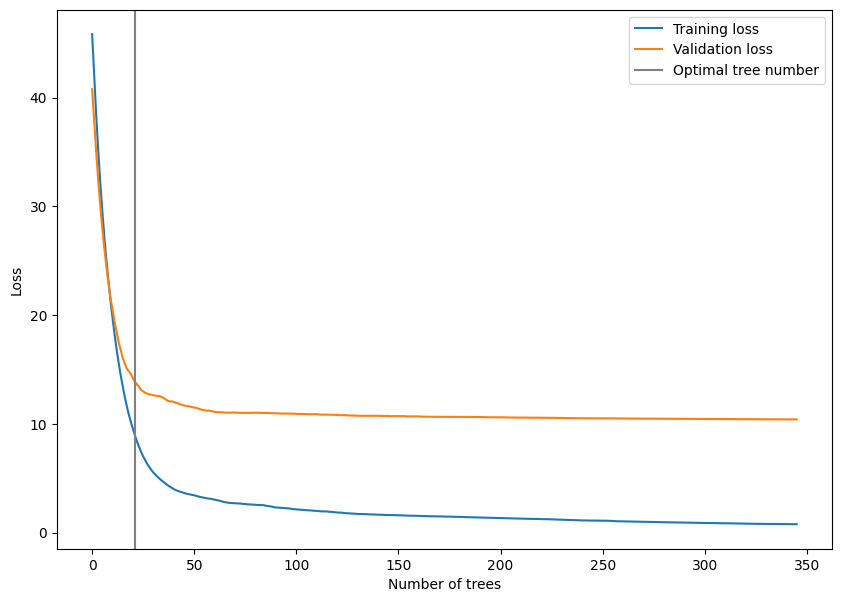

In [74]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [75]:
model.best_iteration

335

In [76]:
y_pred = model.predict(X_test, iteration_range=(0, model.best_iteration+10))

In [77]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Test):", mse_test)

# Calculate the RMSE
rmse_test = root_mean_squared_error(y_test, y_pred)
print("RMSE (Test):", rmse_test)

# Calculate the MAE
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (Test):", mae_test)

# Calculate the R-squared score
r2_test = r2_score(y_test, y_pred)
print("R-squared (Test):", r2_test)


MSE (Test): 108.2868709481119
RMSE (Test): 10.406097777174299
MAE (Test): 1.280658318430137
R-squared (Test): 0.9444420792709273


### LightGBM

In [78]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor(num_leaves=10, learning_rate=0.1, n_estimators=1000, max_depth=5)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="l1", callbacks=[lgb.early_stopping(10)])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 5931, number of used features: 7
[LightGBM] [Info] Start training from score 12.755721
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[232]	valid_0's l1: 1.95497	valid_0's l2: 73.833


LGBMRegressor(max_depth=5, n_estimators=1000, num_leaves=10)

In [79]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Calculate the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("MSE (Test):", mse_test)

# Calculate the RMSE
rmse_test = root_mean_squared_error(y_test, y_pred)
print("RMSE (Test):", rmse_test)

# Calculate the MAE
mae_test = mean_absolute_error(y_test, y_pred)
print("MAE (Test):", mae_test)

# Calculate the R-squared score
r2_test = r2_score(y_test, y_pred)
print("R-squared (Test):", r2_test)

MSE (Test): 73.83301676690388
RMSE (Test): 8.592614082274606
MAE (Test): 1.954971942847042
R-squared (Test): 0.9621190560147452


# 3. Model Validation

The choice of metrics is left up to you. Indeed, one of your missions once in the team will be to define accurate metrics that mimic the business needs of our clients, and anticipate the possible dysfunctionalities of deployed models.

Discuss metrics results and your model performances.

In [81]:
training_data_no_outlier.describe()

,FlownMonth,ProductCode,AgentCode,AgentName,ChargeableWeight,Pieces,Revenue,Price [USD/Kg]
count,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7.414000e+03,7414.000000
mean,10.029134,2.475047,382.297275,372.203669,2197.509428,20.663879,1.350330e+04,12.441423
std,0.811168,4.741032,184.687394,179.449220,4933.779091,63.714602,9.033331e+04,49.017728
min,9.000000,0.000000,0.000000,0.000000,0.300000,1.000000,0.000000e+00,0.000000
25%,9.000000,0.000000,213.000000,223.000000,177.000000,1.000000,1.848250e+02,0.415800
50%,10.000000,0.000000,385.000000,377.000000,639.000000,5.000000,4.693850e+02,0.630000
75%,11.000000,1.000000,567.000000,556.000000,1988.250000,14.000000,1.633800e+03,2.750000
max,11.000000,17.000000,678.000000,663.000000,92076.000000,1008.000000,1.825425e+06,734.333300


## Conclusion

To conclude, we chose the Root Mean square error and the R-squared error to evaluate the models as they are the most representative compared to our data.

Finally, the best model is the LightGBM with the maximum R-squared error of 96.21% and a RMSE of 8.59 which is not so bad as the standard deviation of the price is 49.